# Final Project Submission

Please fill out:
* Student name: Sung Bae
* Student pace: full time
* Scheduled project review date/time: 9/17/2020 7:00 PM
* Instructor name: James Irving
* Blog post URL:


## Importing Various Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore') # Ignores big red warning signs
 
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
# importing my own python file
# %load_ext autoreload
# %autoreload 2
from shb import MakeModel
import shb

In [3]:
sns.set(font_scale=2)
sns.set_style('darkgrid')

# Model #1

## Importing data

In [4]:
# import 'kc_house_data.csv'
df = pd.read_csv('kc_house_data.csv')
len(df.columns)

21

In [5]:
(df['id'].value_counts()>1).sum()
print(df.lat.shape, df.long.shape, df.price.shape)
print(df.lat.isna().sum(), df.long.isna().sum(), df.price.isna().sum())
df.info()

(21597,) (21597,) (21597,)
0 0 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
m

[Text(0.5, 0, 'time (month after 2014)'),
 Text(0, 0.5, 'Total Sales ($)'),
 Text(0.5, 1.0, 'Monthly Total House Sales from 2014-2015')]

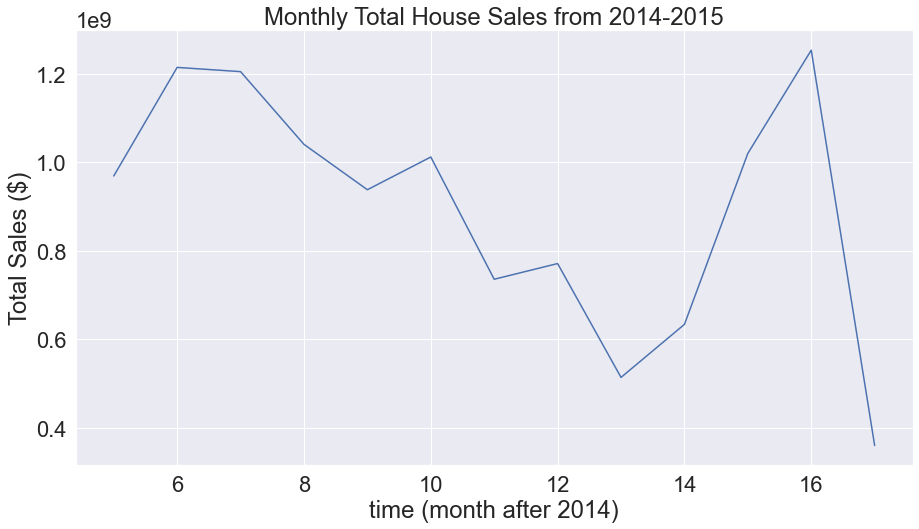

In [6]:
df['time'] = df['date'].apply(lambda x: int(x.split('/')[0]) + (int(x.split('/')[2])-2014)*12)
df.groupby('time').sum()['price'].values

fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(x=df.groupby('time').sum()['price'].keys(), 
            y=df.groupby('time').sum()['price'].values, ax=ax)
ax.set(xlabel='time (month after 2014)', ylabel='Total Sales ($)', title='Monthly Total House Sales from 2014-2015')

NameError: name 'seattle' is not defined

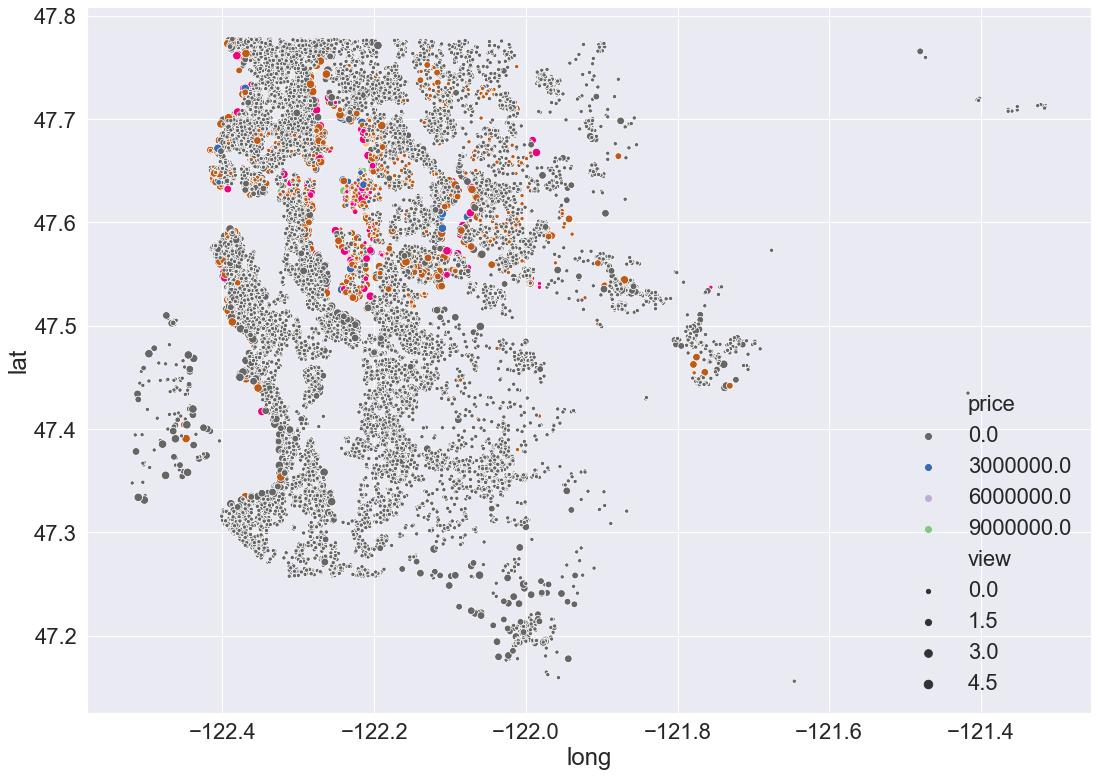

In [7]:
fig, ax = plt.subplots(figsize=(18,13))
sns.scatterplot(x='long', y='lat', size='view', hue='price', data=df, palette='Accent_r', ax=ax )
# sns.pointplot(x=seattle[0], y=seattle[1], marker="*", ax=ax)
ax.scatter(x=seattle[0], y=seattle[1], marker="*", edgecolor='b', c='y',s=1000)
ax.axvline(-122.3321, color='r')
ax.axhline(47.6026, color='r')
# sns.set(rc={'axes.facecolor':'gray', 'figure.facecolor':'white'})
plt.legend(loc=4, fontsize=20)
ax.set(title="House Prices Around King's County Area")

In [7]:
df['time'] = df['date'].apply(lambda x: int(x.split('/')[0]) + (int(x.split('/')[2])-2014)*12)


df.groupby('time').sum()['price'].values

fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(x=df.groupby('time').sum()['price'].keys(), 
            y=df.groupby('time').sum()['price'].values, ax=ax)
ax.set(xlabel='time (month after 2014)', ylabel='Total Sales ($)', title='Monthly Total House Sales from 2014-2015')

In [249]:
# Uncomment and execute the following lines of the codes to skip determining cat/cont columns:
# predetermed categorical colums:
cat_cols = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_renovated','zipcode']
# predetermed continuous colums:
cont_cols = ['price','sqft_living','sqft_lot','sqft_above','yr_built','lat','long','sqft_living15','sqft_lot15']

In [8]:
# # Determining categorical and continous columns by examining histograms
# cat_cols = []
# cont_cols = []
# for col in df.columns:
#     fig, ax = plt.subplots(figsize=(10,7))
#     try:
#         sns.distplot(df[col], bins='auto', ax=ax)
#         ax.set(title=f'{col}', xlabel=f'{col}', ylabel='frequency')
#         plt.show()
#         user_input = input('Category(0) or continuous(1): ')
#         if user_input=='1':
#             cont_cols.append(col)
#         elif user_input=='0':
#             cat_cols.append(col)
#     except:
#         print(col)

## Scrubbing

In [9]:
# checking for any missing values
df[cont_cols].isna().sum()

price            0
sqft_living      0
sqft_lot         0
sqft_above       0
yr_built         0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

> Notice that there aren't any missing values! Yay!

In [10]:
model1 = MakeModel(df)
model1.set_cols(cat=cat_cols, cont=cont_cols)

['date', 'sqft_basement', 'id']
3 columns have been DELETED!
There are now 18 columns in the data.
Model Information
Shape:	(21597, 18)
Perecent Retained:	100
Dropped columns:	['date', 'sqft_basement', 'id']
Categorical columns:	['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'zipcode']
Contiuous columns:	['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Number of OHE columns:	0
Train MSE = None	Train R2 = None
Test MSE = None	Test R2 = None


## Modeling

In [16]:
model1.split(option='cont')

Shape of X_train: (16197, 8)
Shape of X_test: (5400, 8)
Shape of y_train: (16197,)
Shape of y_test: (5400,)


In [18]:
model1.regression()

Formula:
price ~ sqft_living + sqft_lot + sqft_above + yr_built + lat + long + sqft_living15 + sqft_lot15


In [19]:
model1.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     3098.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:51:27   Log-Likelihood:            -2.2297e+05
No. Observations:               16197   AIC:                         4.460e+05
Df Residuals:                   16188   BIC:                         4.460e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.101e+07   1.96e+06    -31.143      0.000   -6.49e+07   -5.72e+07
sqft_living     213.5500      4.490     47.558      0.000     204.749     222.351
sqft_lot          0.1968      0.063      3.101      0.002       0.072       0.321
sqft_above       41.4147      4.946      8.373      0.000      31.719      51.110
yr_built      -1756.6011     72.856    -24.111      0.000   -1899.407   -1613.796
lat            6.128e+05   1.35e+04     45.531      0.000    5.86e+05    6.39e+05
long          -2.876e+05   1.51e+04    -19.047      0.000   -3.17e+05   -2.58e+05
sqft_living15   101.8030      4.265     23.870      0.000      93.443     110.163
sqft_lot15       -0.4923      0.097     -5.064      0.000      -0.683      -0.302
==============================================================================
Omnibus:                    12613.706   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           656403.914
Skew:                           3.303   Prob(JB):                         0.00
Kurtosis:                      33.479   Cond. No.                     5.39e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train MSE = 0.11499720229206366	Train R2 = 0.40697296003816763
Test MSE = 0.1129393451294835	Test R2 = 0.4184830674145358


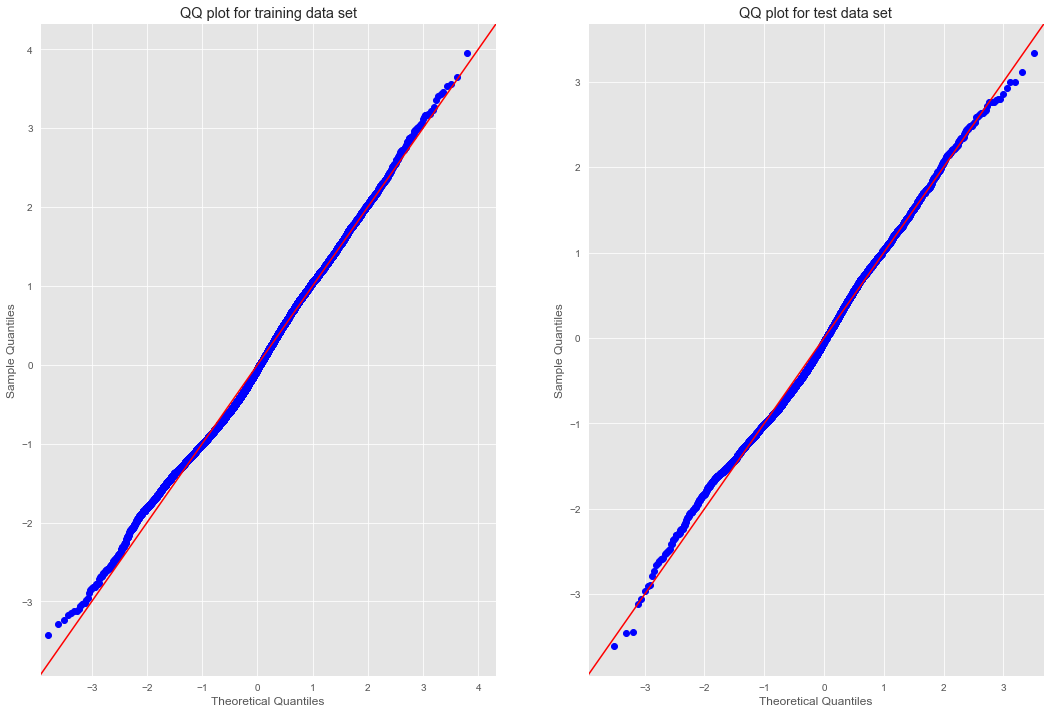

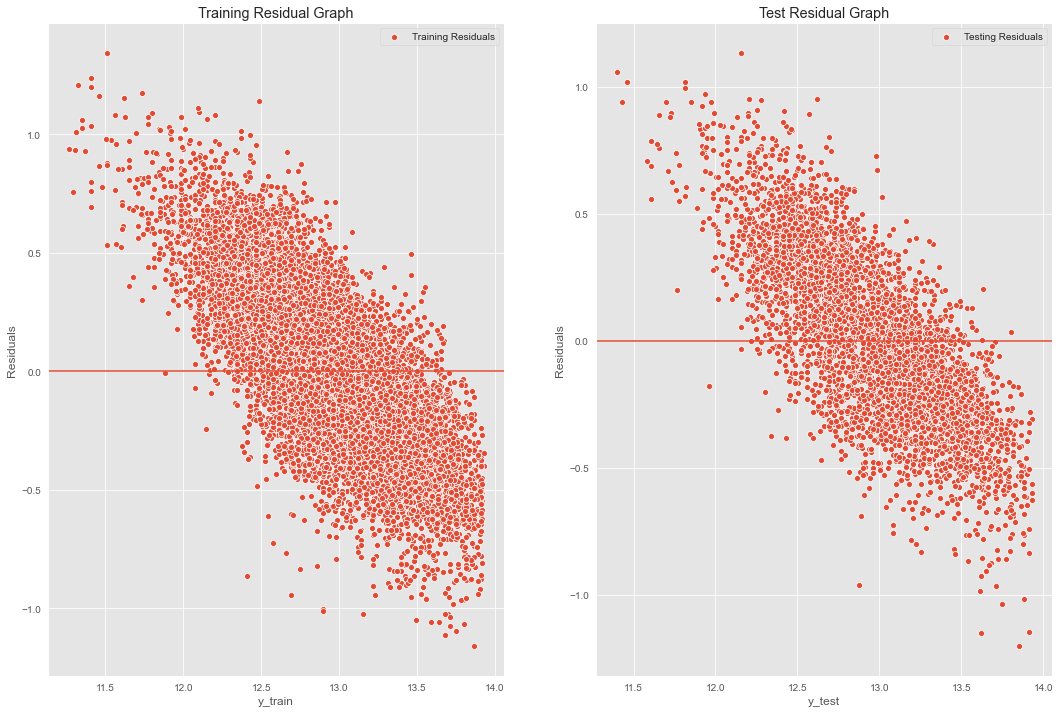

In [83]:
model1.validate_model()

## Intrepret

> Features:
    - Only used continuous data

> Observations:
    - Low r2 values - not a good predictor
    - QQ-plots show normal residuals for both test and train data
    - Homoscedasticity is biased


## Questions

> Questions
    1. What categorical data should I add in order to increase r2 value?
    2. What new features can I add to make the model a better predictor?
    

# Model #2

## Preprocessing Data
In this model, we will include categorical data and we will normalize and filter out outliers in order to make the model better in both accuracy and interpretability.

### Importing Data

In [22]:
# import 'kc_house_data.csv'
df = pd.read_csv('kc_house_data.csv')
# len(df.columns)

In [23]:
# Initialize our second model
model2 = MakeModel(df)

### Dealing with NaN's

In [28]:
model2.count_na()

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64


> Changes:
    - waterfront: fillna with 0.
    - yr_renovated: boolean where 1 means renovated and 0 means not renovated. fill na's with 0s.
    - yr_built: make a new column called age = current year - yr_built
    - view: fillna with mode (0.0)

In [30]:
# waterfront: fillnas with 0s. view:fillnas with mode
model2.imuter('waterfront', option=0);
model2.imuter('view', option='mode');


Number of nulls:  0
None
Number of nulls:  0
None


In [31]:
model2.count_na()

yr_renovated     3842
sqft_lot15          0
view                0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64


### Creating New Feature - 'age'

In [36]:
# yr_renovated into booleans
model2.data['yr_renovated'] = model2.data['yr_renovated']>1000

In [37]:
# Create a new column 'age' and drop 'yr_built'
model2.data['age'] = 2019 - model2.data['yr_built']
model2.data.drop(columns='yr_built', axis=1, inplace=True)

In [88]:
model2.data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'age'],
      dtype='object')

### Checking for Linearity and classifying columns into catergorical / continuous

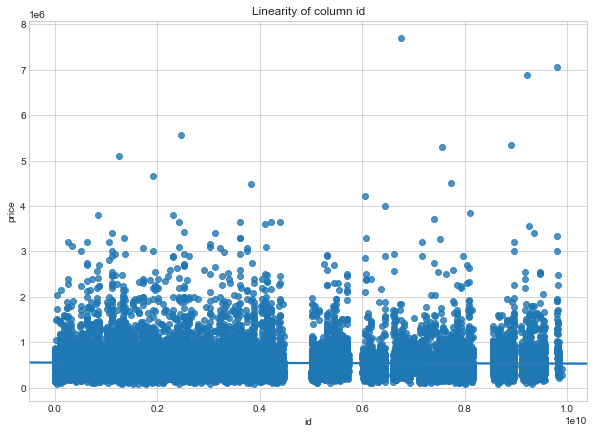


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'id' has been DELETED!
There are now 21 columns in the data.
date


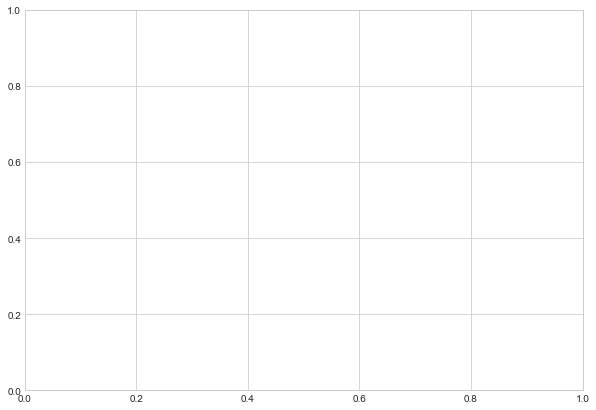

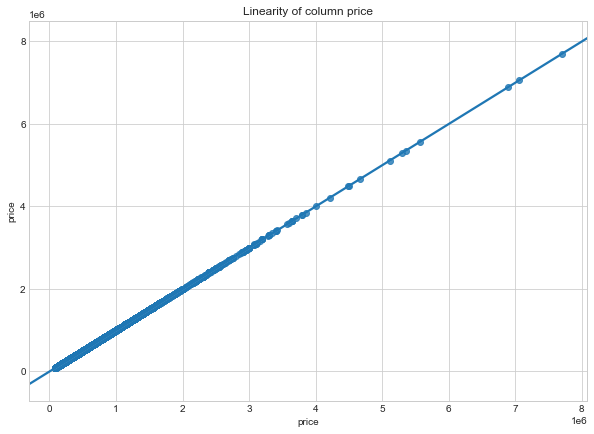


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'price' has been added to continuous columns!'


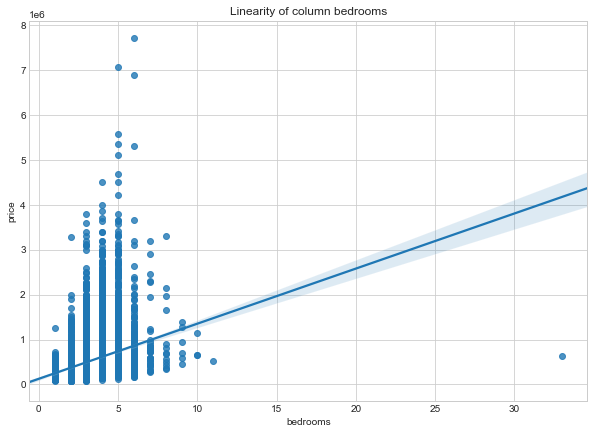


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'bedrooms' has been added to continuous columns!'


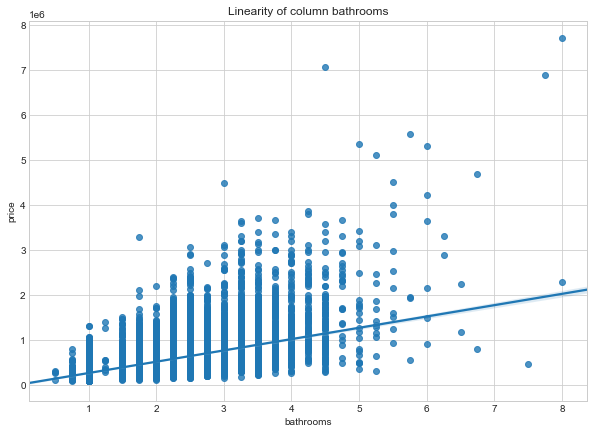


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'bathrooms' has been added to continuous columns!'


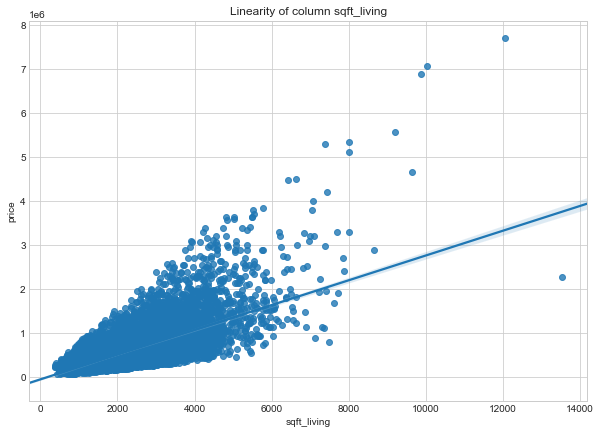


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'sqft_living' has been added to continuous columns!'


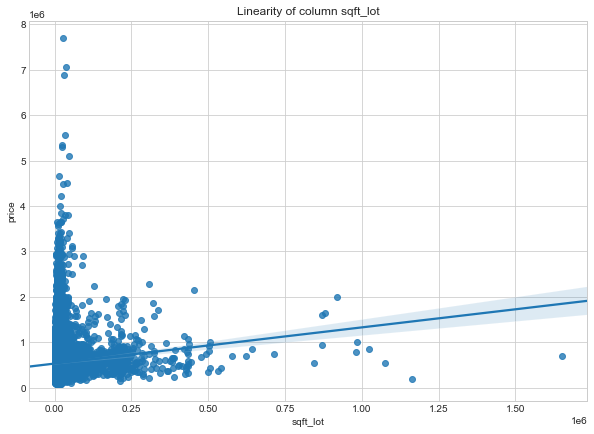


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'sqft_lot' has been DELETED!
There are now 21 columns in the data.


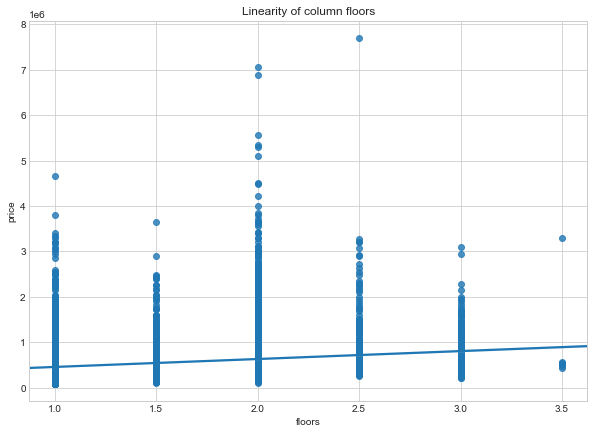


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'floors' has been DELETED!
There are now 21 columns in the data.


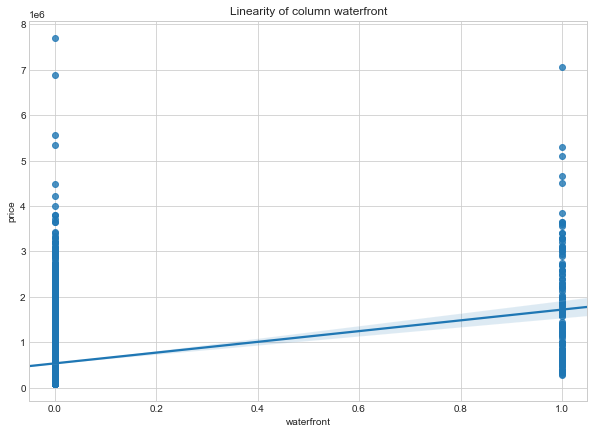


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 1
'waterfront' has been added to categorical columns!'


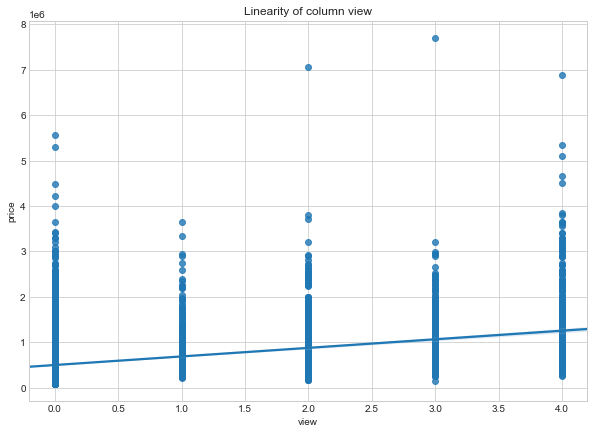


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 1
'view' has been added to categorical columns!'


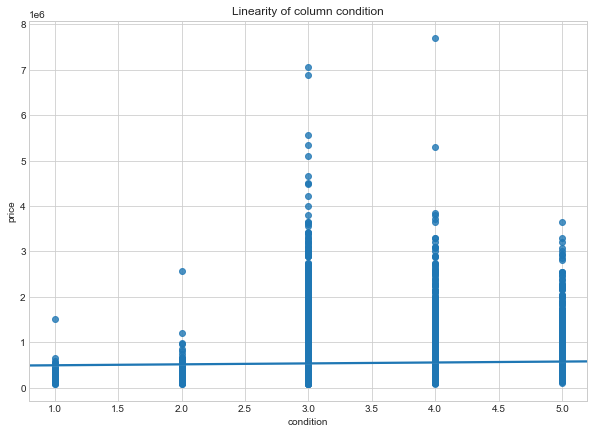


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 1
'condition' has been added to categorical columns!'


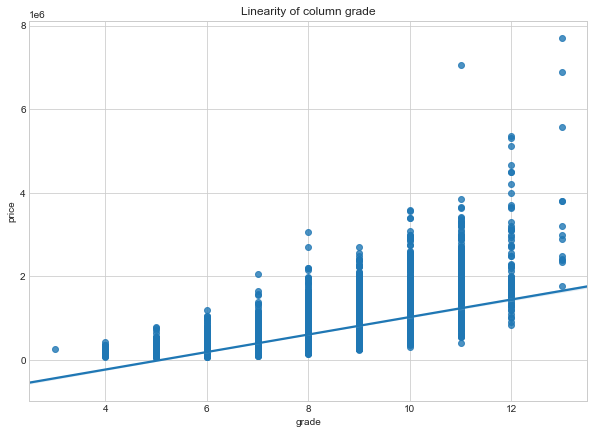


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 1
'grade' has been added to categorical columns!'


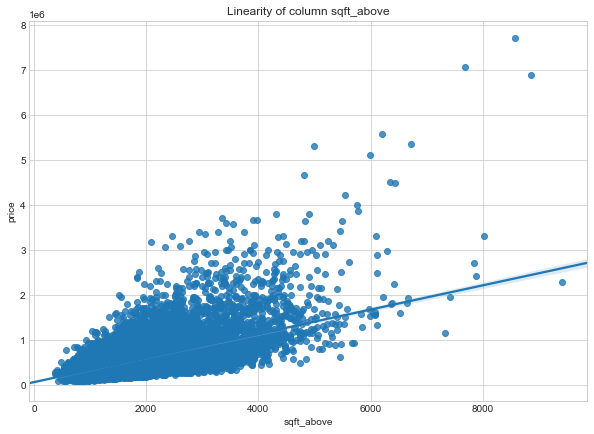


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'sqft_above' has been added to continuous columns!'
sqft_basement


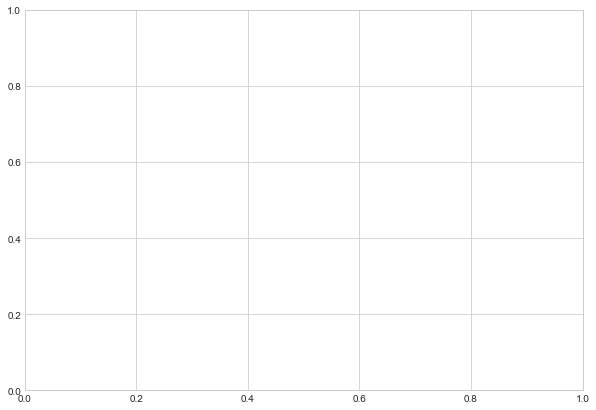

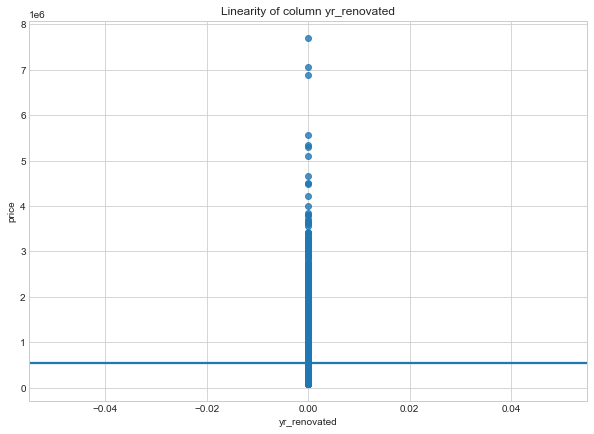


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'yr_renovated' has been DELETED!
There are now 21 columns in the data.


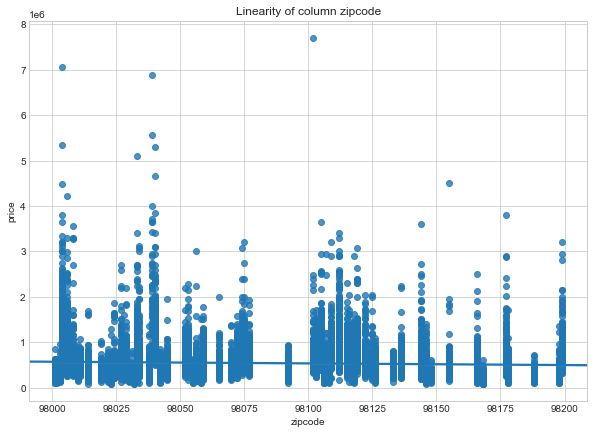


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'zipcode' has been DELETED!
There are now 21 columns in the data.


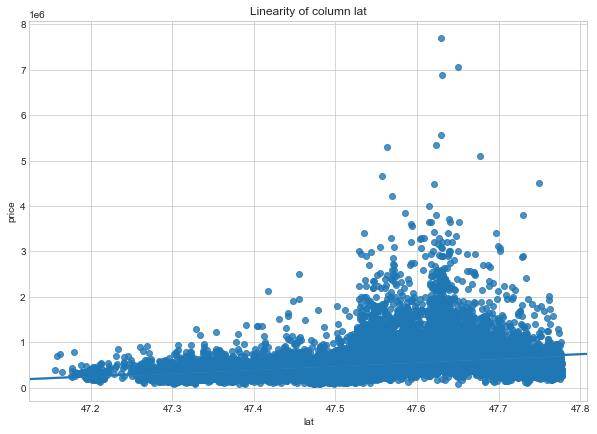


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'lat' has been added to continuous columns!'


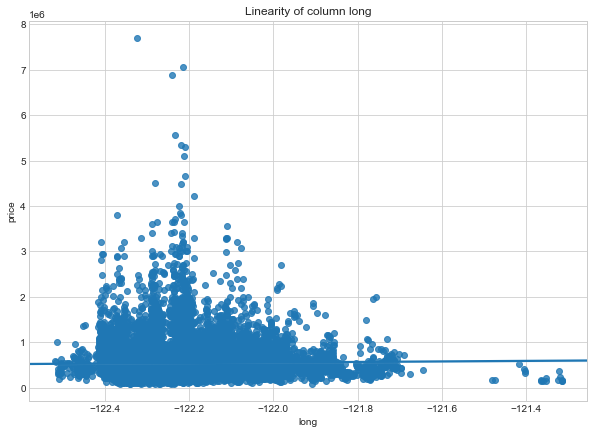


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'long' has been added to continuous columns!'


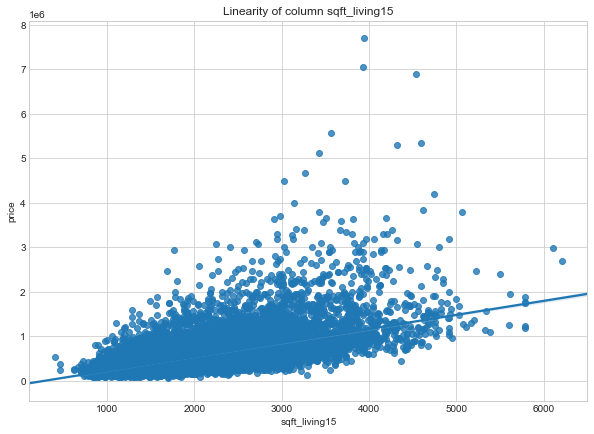


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'sqft_living15' has been added to continuous columns!'


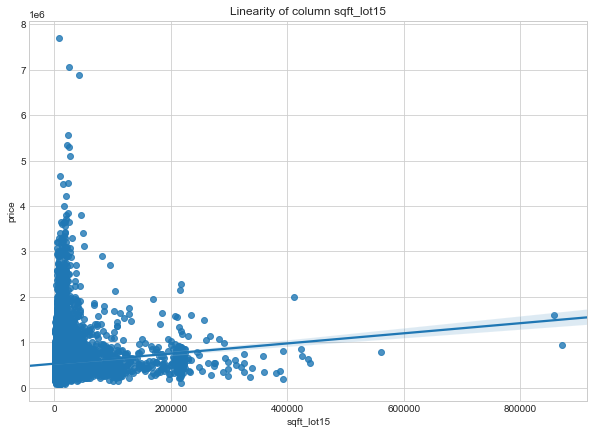


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'sqft_lot15' has been added to continuous columns!'


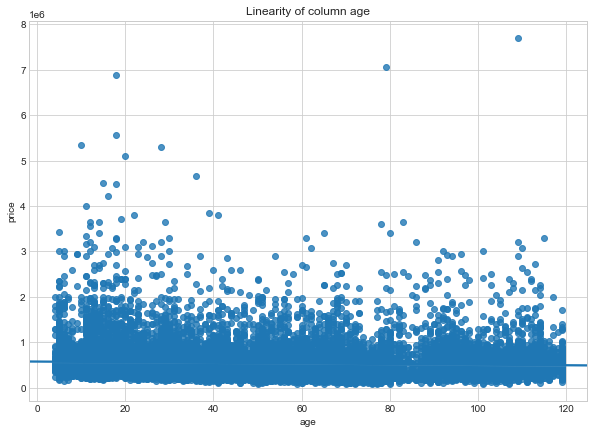


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'age' has been added to continuous columns!'


In [38]:
# Categorize each col into either categorical, continous or just drop
# Also check for linearity between each variable vs. price (target)
model2.col_classifier()

In [39]:
print(model2)

Model Information
Shape:	(21597, 21)
Perecent Retained:	100
Dropped columns:	['id', 'sqft_lot', 'floors', 'yr_renovated', 'zipcode']
Categorical columns:	['waterfront', 'view', 'condition', 'grade']
Contiuous columns:	['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age']
Number of OHE columns:	0
Train MSE = None	Train R2 = None
Test MSE = None	Test R2 = None
Model Information Completed


### Identifying possible multicolinear variables


                    Options:
                    	1. Correlation Matrix
                    	2. Variance Inflation Factor (VIF)
                  
Choose which method you would like to determine multicolinearity variables: 1


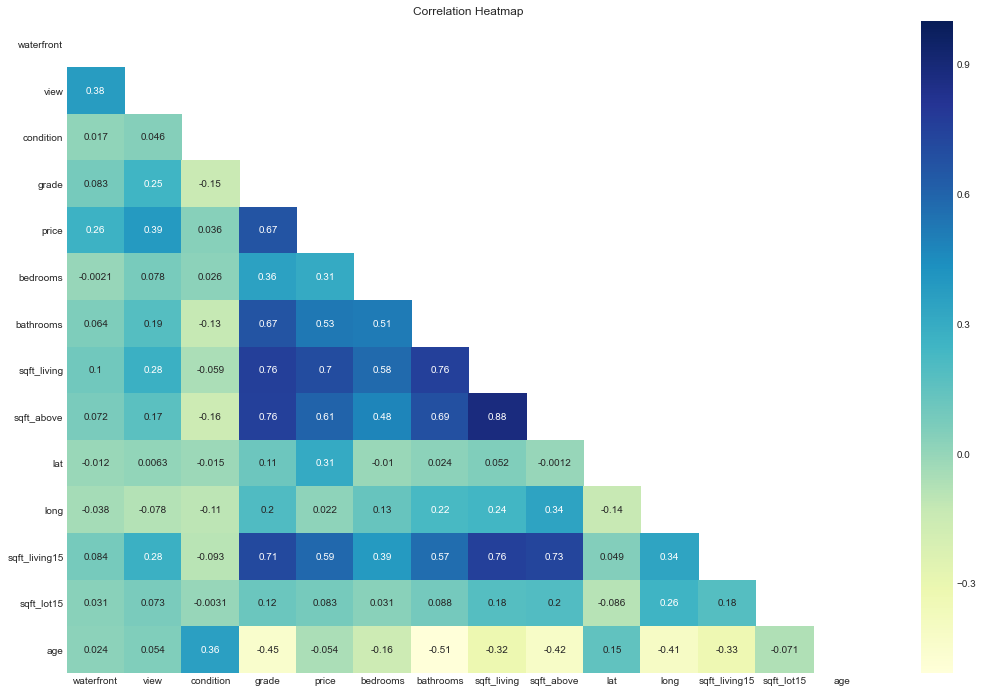

sqft_living  sqft_above       0.876448
grade        sqft_living      0.762779
sqft_living  sqft_living15    0.756402
grade        sqft_above       0.756073
bathrooms    sqft_living      0.755758
sqft_above   sqft_living15    0.731767
grade        sqft_living15    0.713867
price        sqft_living      0.701917
bathrooms    sqft_above       0.686668
grade        price            0.667951
dtype: float64


Write column name you would like to get rid of (Enter "x" to exit): sqft_above
'sqft_above' has been DELETED!
There are now 21 columns in the data.


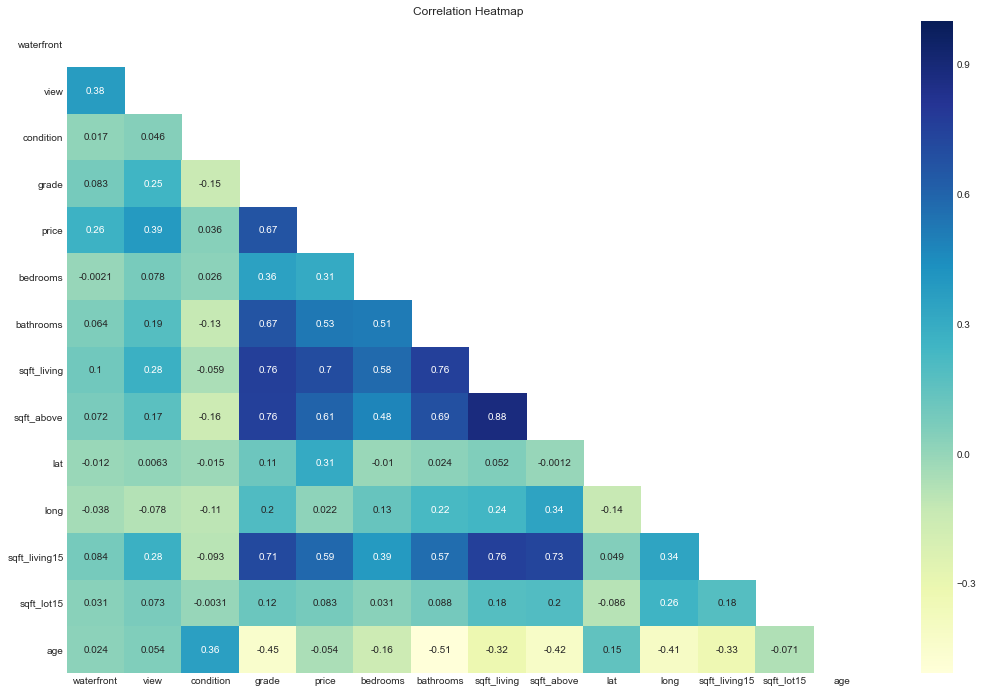

sqft_living  sqft_above       0.876448
grade        sqft_living      0.762779
sqft_living  sqft_living15    0.756402
grade        sqft_above       0.756073
bathrooms    sqft_living      0.755758
sqft_above   sqft_living15    0.731767
grade        sqft_living15    0.713867
price        sqft_living      0.701917
bathrooms    sqft_above       0.686668
grade        price            0.667951
dtype: float64


Write column name you would like to get rid of (Enter "x" to exit): sqft_living15
'sqft_living15' has been DELETED!
There are now 21 columns in the data.


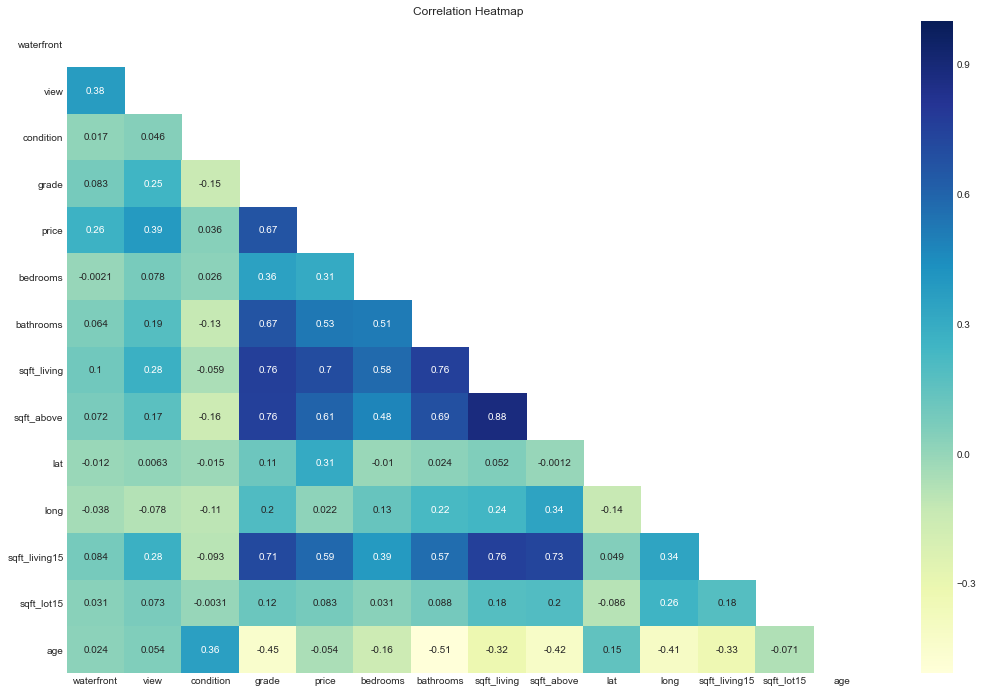

sqft_living  sqft_above       0.876448
grade        sqft_living      0.762779
sqft_living  sqft_living15    0.756402
grade        sqft_above       0.756073
bathrooms    sqft_living      0.755758
sqft_above   sqft_living15    0.731767
grade        sqft_living15    0.713867
price        sqft_living      0.701917
bathrooms    sqft_above       0.686668
grade        price            0.667951
dtype: float64


Write column name you would like to get rid of (Enter "x" to exit): x
Exiting!
There are 21 columns remaining in the data


In [40]:
model2.multicolinearity()
# model2.cont_cols

In [41]:
print(model2)

Model Information
Shape:	(21597, 21)
Perecent Retained:	100
Dropped columns:	['id', 'sqft_lot', 'floors', 'yr_renovated', 'zipcode', 'sqft_above', 'sqft_living15']
Categorical columns:	['waterfront', 'view', 'condition', 'grade']
Contiuous columns:	['price', 'bedrooms', 'bathrooms', 'sqft_living', 'lat', 'long', 'sqft_lot15', 'age']
Number of OHE columns:	0
Train MSE = None	Train R2 = None
Test MSE = None	Test R2 = None
Model Information Completed


### Checking for Normality - Scaling Data

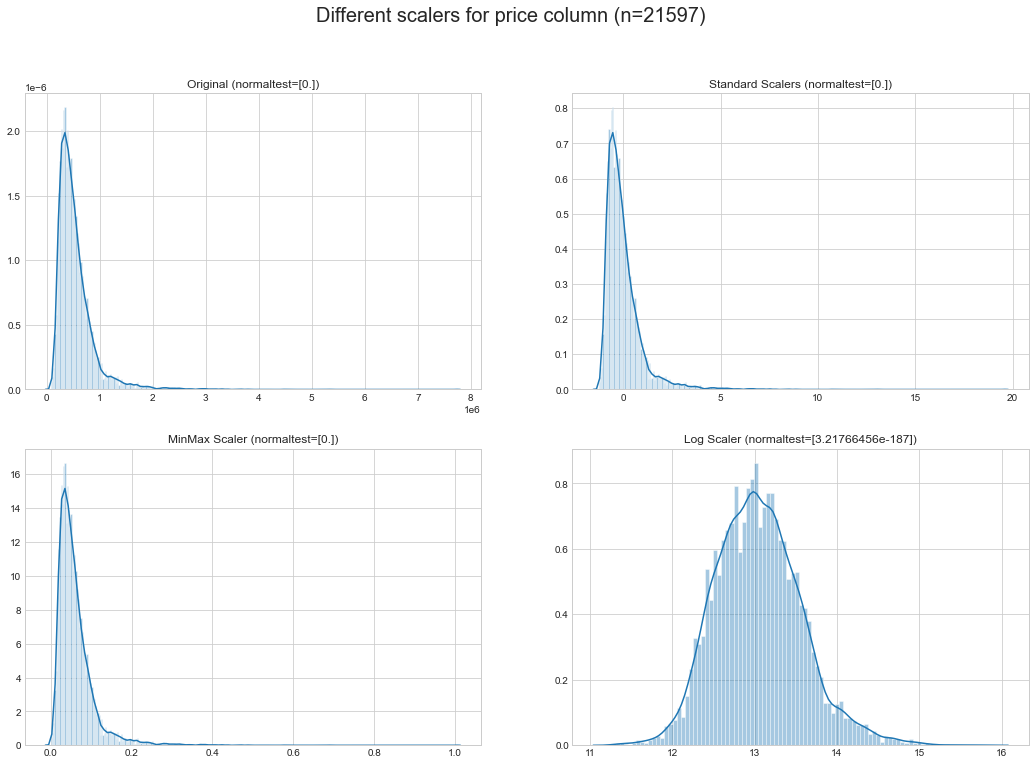

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


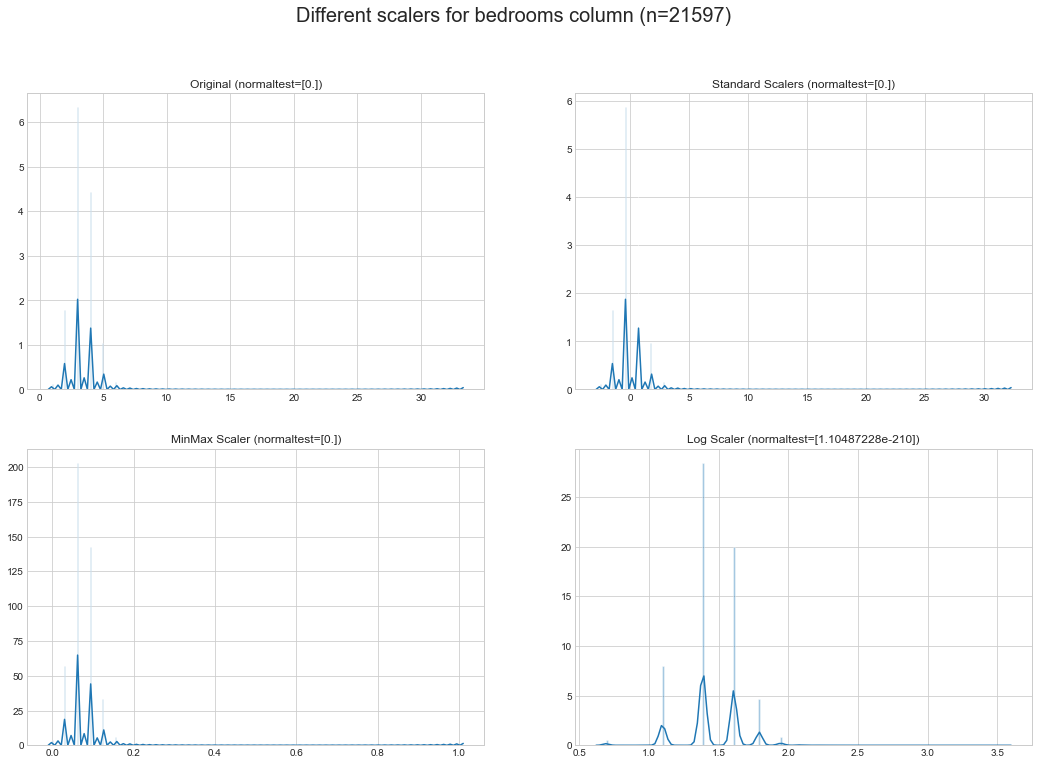

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 2


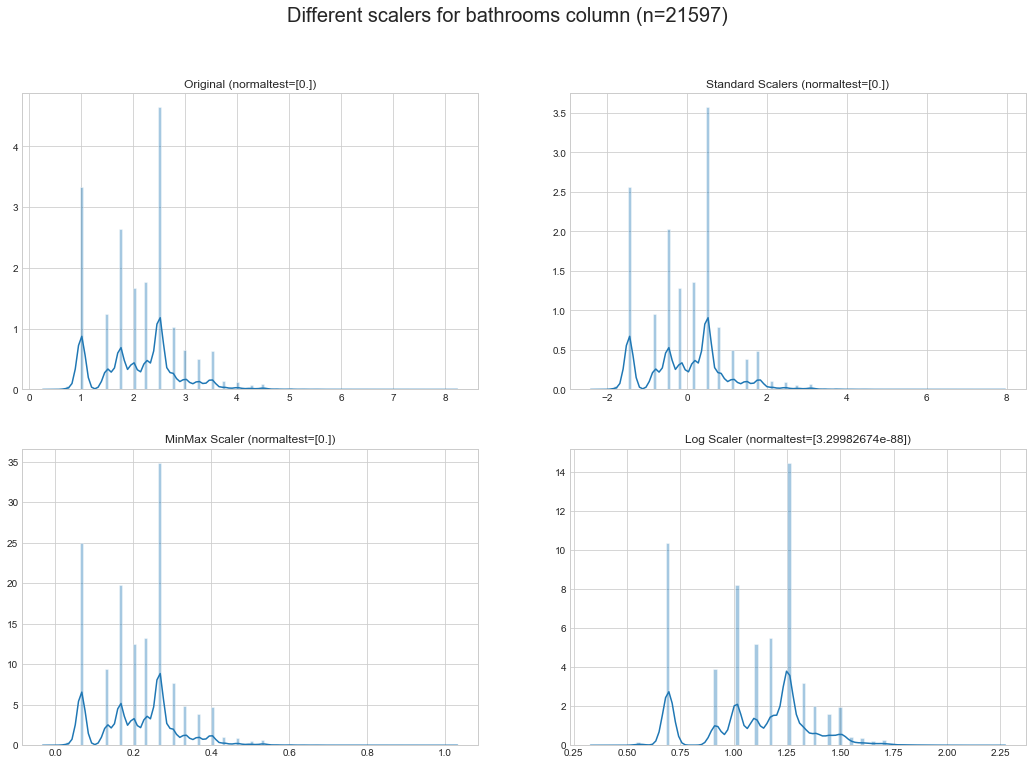

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 2


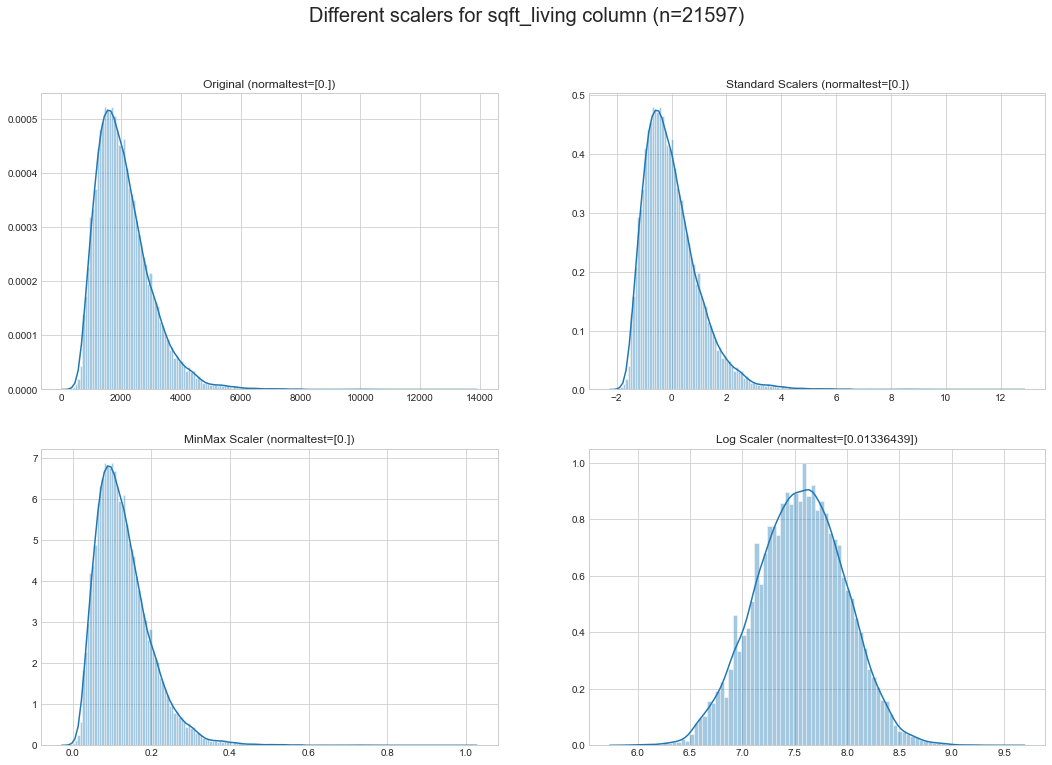

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


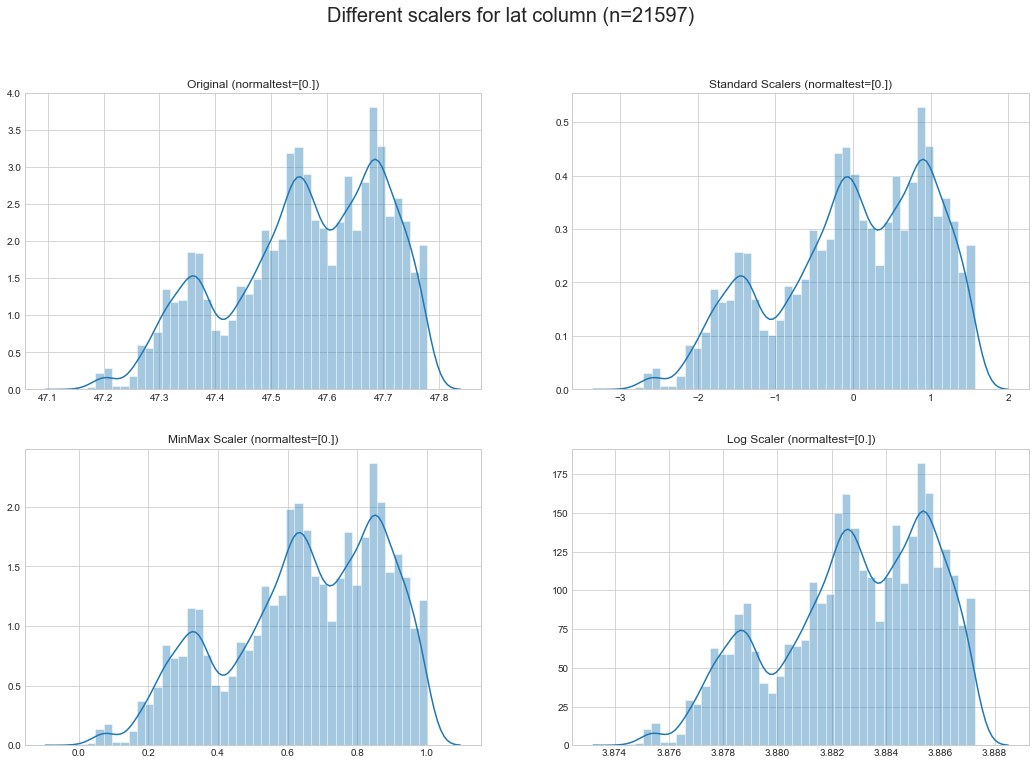

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 2
Error occured


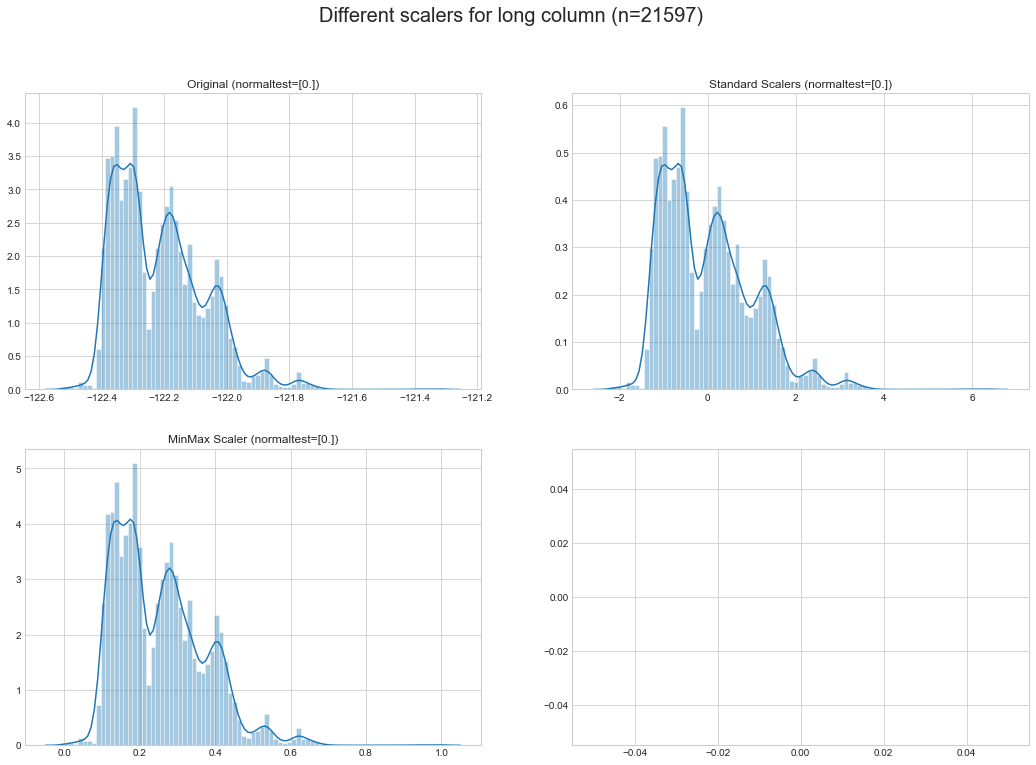

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 2


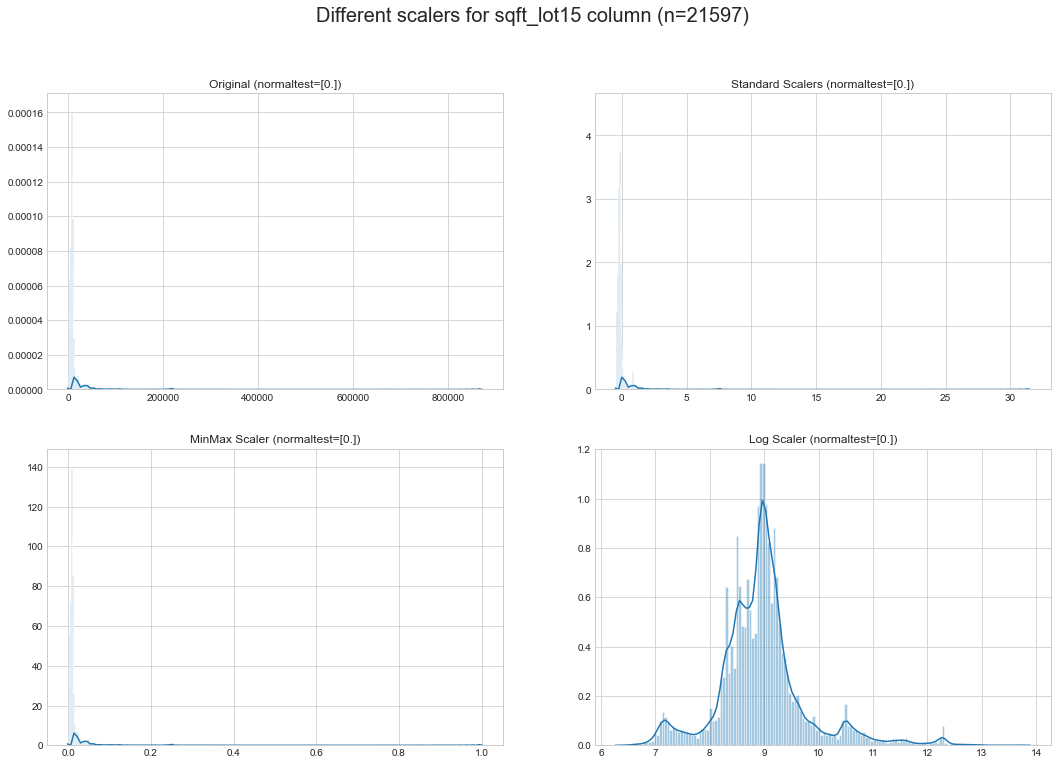

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


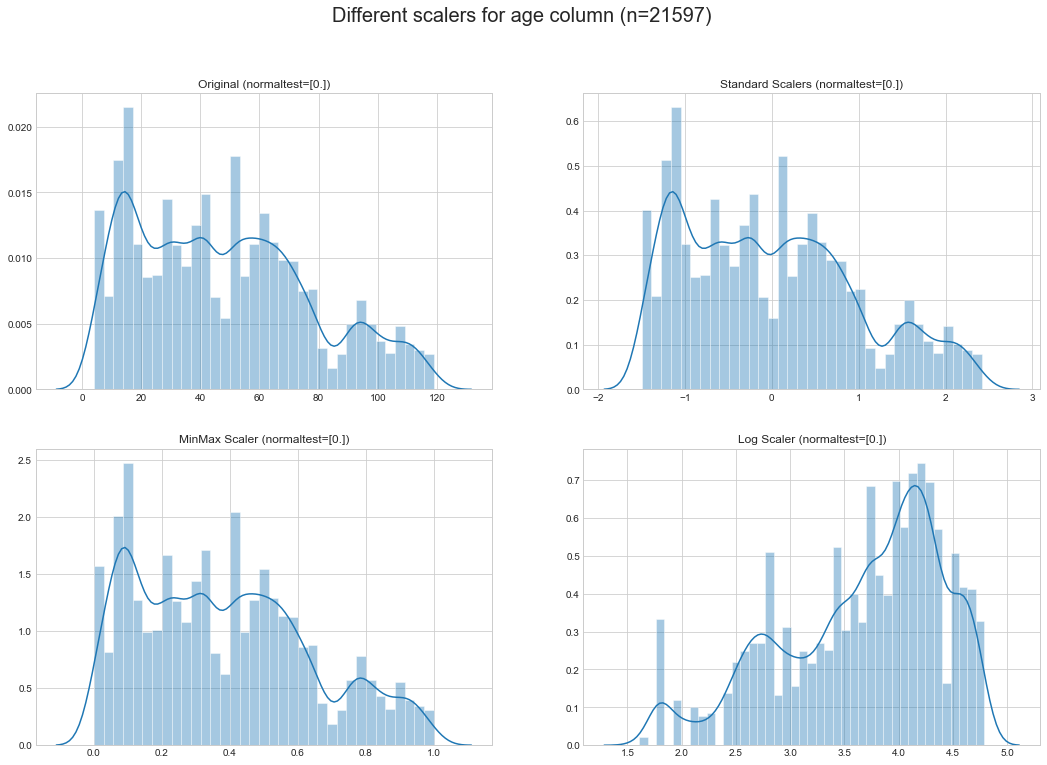

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 2


In [42]:
# Goes through each remaining continuous columns to scale the data to make them "more" normal.
for col in model2.cont_cols:
    model2.scaler(col)

In [43]:
# the following shows different scalers used for different columns
model2.transformers

{'price': FunctionTransformer(accept_sparse=False, check_inverse=True,
                     func=<ufunc 'log1p'>, inv_kw_args=None, inverse_func=None,
                     kw_args=None, pass_y='deprecated', validate=True),
 'bedrooms': StandardScaler(copy=True, with_mean=True, with_std=True),
 'bathrooms': StandardScaler(copy=True, with_mean=True, with_std=True),
 'sqft_living': FunctionTransformer(accept_sparse=False, check_inverse=True,
                     func=<ufunc 'log1p'>, inv_kw_args=None, inverse_func=None,
                     kw_args=None, pass_y='deprecated', validate=True),
 'lat': StandardScaler(copy=True, with_mean=True, with_std=True),
 'long': StandardScaler(copy=True, with_mean=True, with_std=True),
 'sqft_lot15': FunctionTransformer(accept_sparse=False, check_inverse=True,
                     func=<ufunc 'log1p'>, inv_kw_args=None, inverse_func=None,
                     kw_args=None, pass_y='deprecated', validate=True),
 'age': StandardScaler(copy=True, with_mean=

### Filtering Out Unwanted Outliers

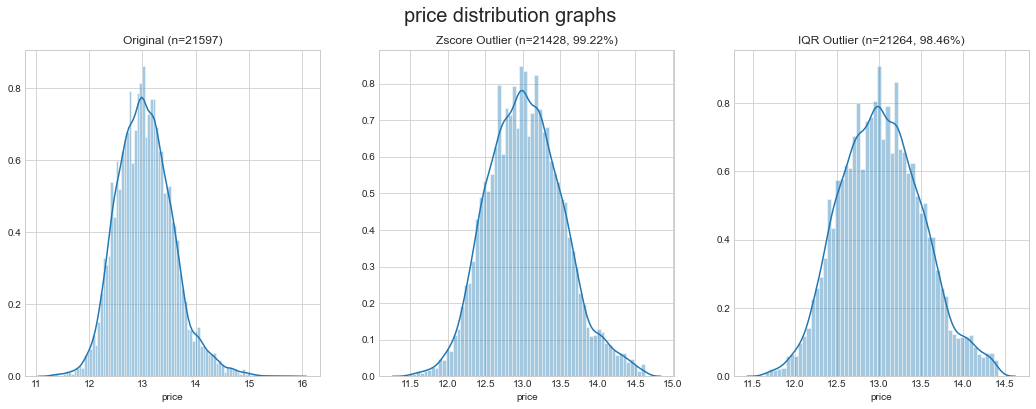

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


333 number of data have been removed by this process.

So far we have 98.458% of original data.


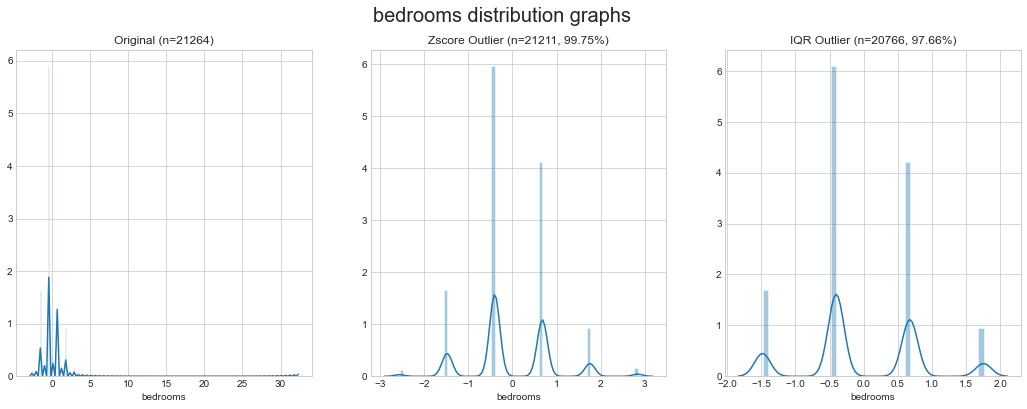

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


498 number of data have been removed by this process.

So far we have 96.152% of original data.


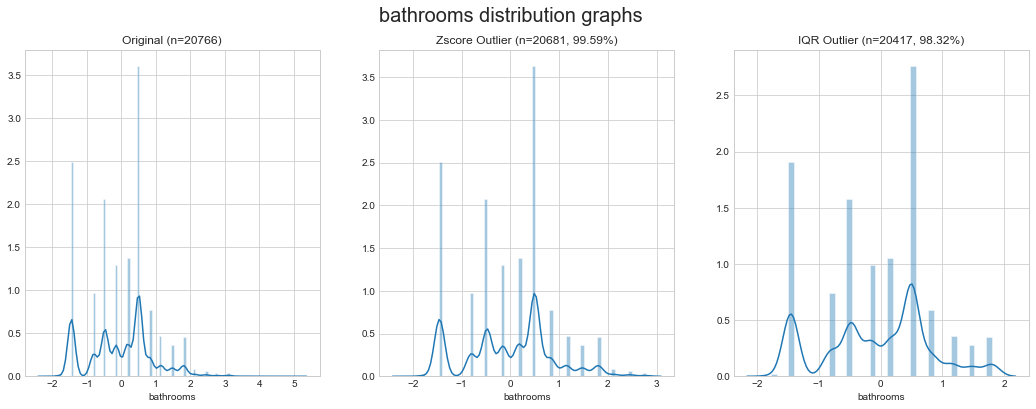

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


349 number of data have been removed by this process.

So far we have 94.536% of original data.


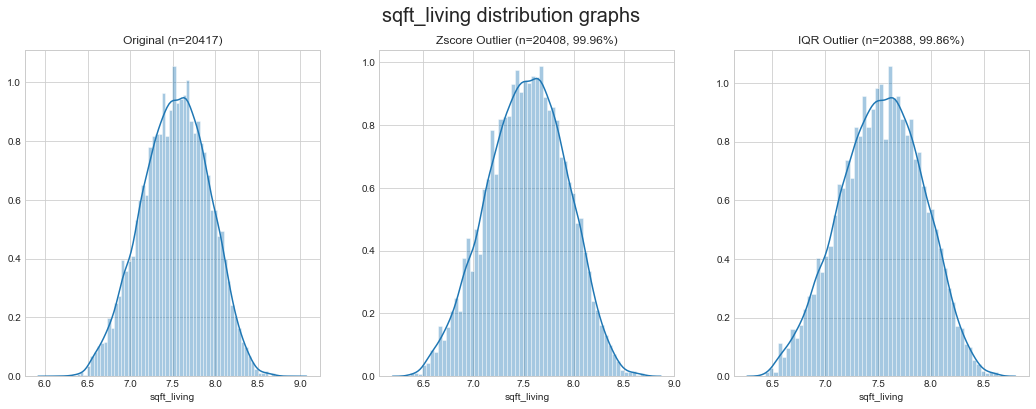

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


29 number of data have been removed by this process.

So far we have 94.402% of original data.


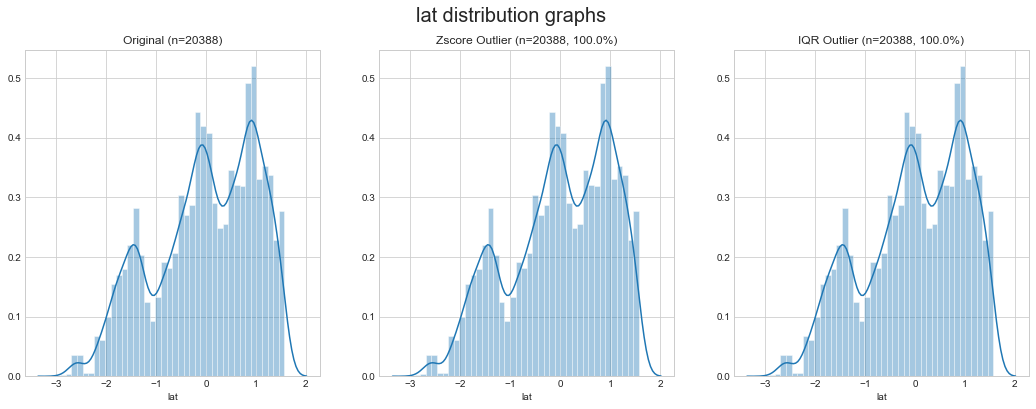

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


0 number of data have been removed by this process.

So far we have 94.402% of original data.


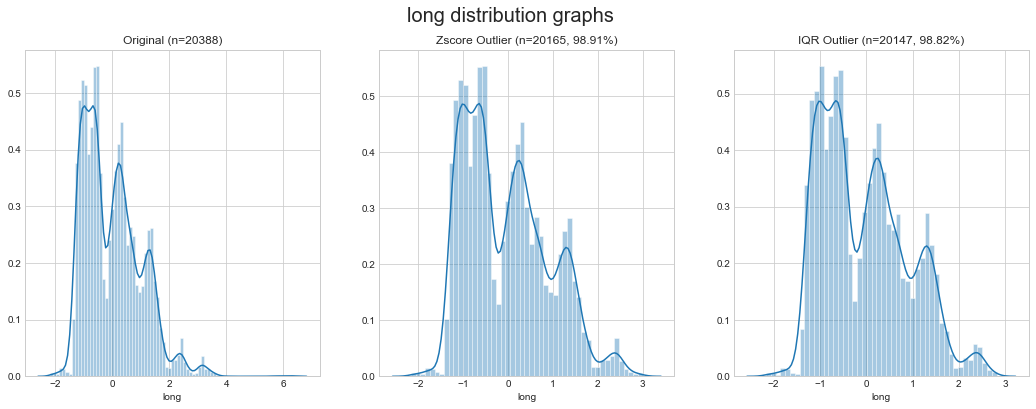

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


241 number of data have been removed by this process.

So far we have 93.286% of original data.


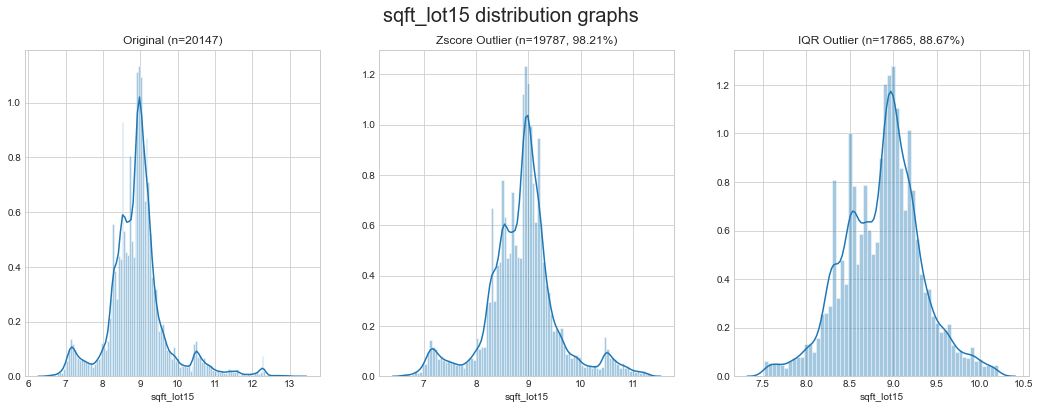

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


2282 number of data have been removed by this process.

So far we have 82.72% of original data.


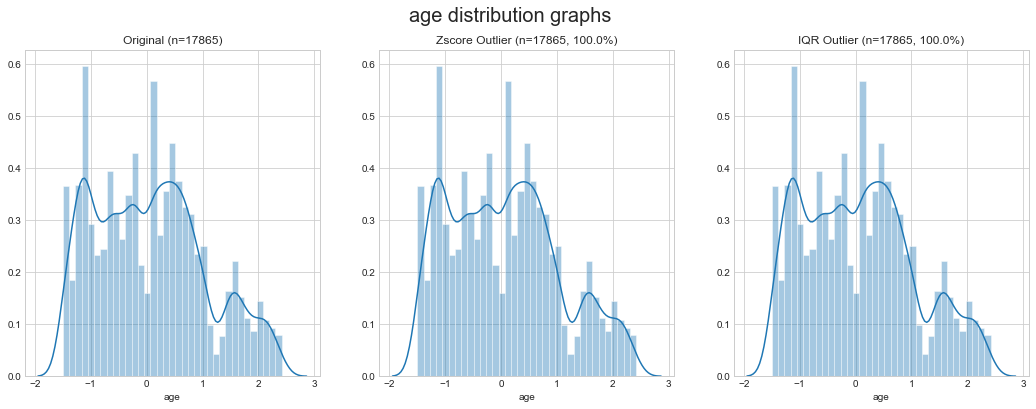

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 1
nothing has changed.


In [44]:
for col in model2.cont_cols:
    model2.outlier(col)

## Making a Model

### Splitting Data

In [45]:
# Set X,y and split data
model2.split()

Shape of X_train: (13398, 7)
Shape of X_test: (4467, 7)
Shape of y_train: (13398,)
Shape of y_test: (4467,)


### OLS

In [46]:
model_2 = model2.regression()
model_2.summary()

Formula:
price ~ bedrooms + bathrooms + sqft_living + lat + long + sqft_lot15 + age


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     3512.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:07:56   Log-Likelihood:                -2357.4
No. Observations:               13398   AIC:                             4731.
Df Residuals:                   13390   BIC:                             4791.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.4075      0.089     82.782      0.000       7.232       7.583
bedrooms       -0.0629      0.004    -16.811      0.000      -0.070      -0.056
bathrooms       0.0832      0.005     16.957      0.000       0.074       0.093
sqft_living     0.8055      0.011     71.850      0.000       0.784       0.827
lat             0.2104      0.003     81.985      0.000       0.205       0.215
long            0.0069      0.003      2.109      0.035       0.000       0.013
sqft_lot15     -0.0515      0.006     -8.755      0.000      -0.063      -0.040
age             0.0939      0.003     27.331      0.000       0.087       0.101
==============================================================================
Omnibus:                      163.610   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.203
Skew:                           0.153   Prob(JB):                     3.78e-51
Kurtosis:                       3.568   Cond. No.                         422.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Observations
    - r_2_score = 0.647 is an 'okay' value that can be used for interpretation of the model.
    - Not so hot in predicting outcomes
    - Biggest affectors:
        - sqft_living - more space more price
        - Intercept - tells us that houeses are just expensive
        - Latitude - seems like high land value areas are somewhat dependant on latitude
    - Negative affectors:
        - sqft_lot : seems like having a big lot isn't a good thing after all according to this model
        

### Model Vadliation

Train MSE = 0.08324408411811837	Train R2 = 0.6474103914595521
Test MSE = 0.08302960705730707	Test R2 = 0.6364824083924583


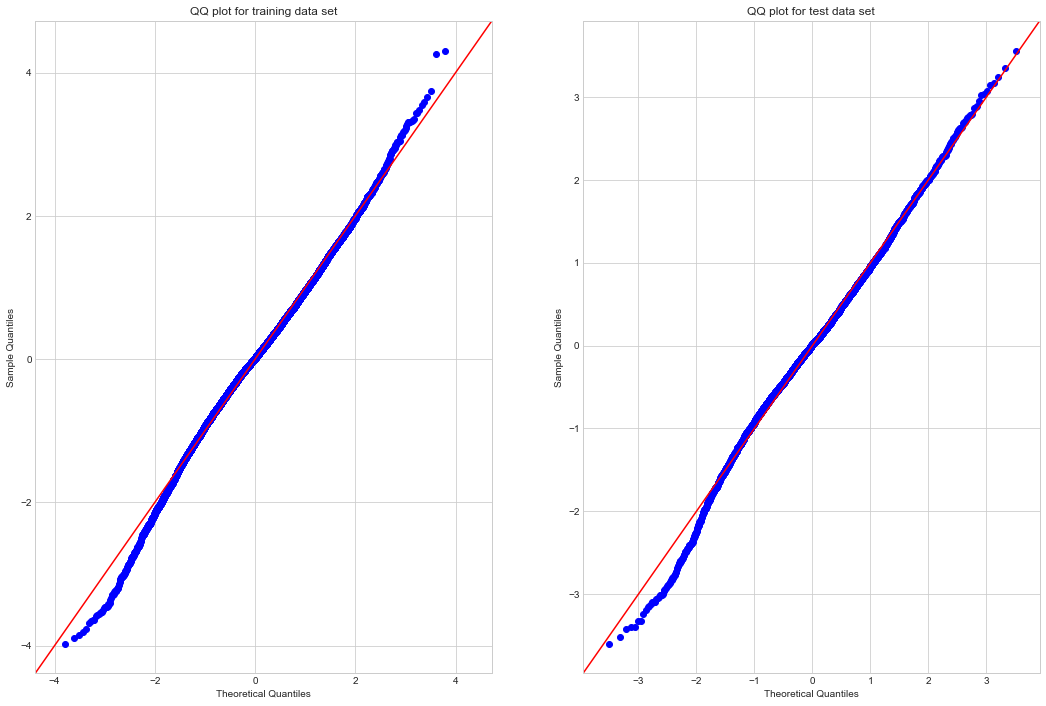

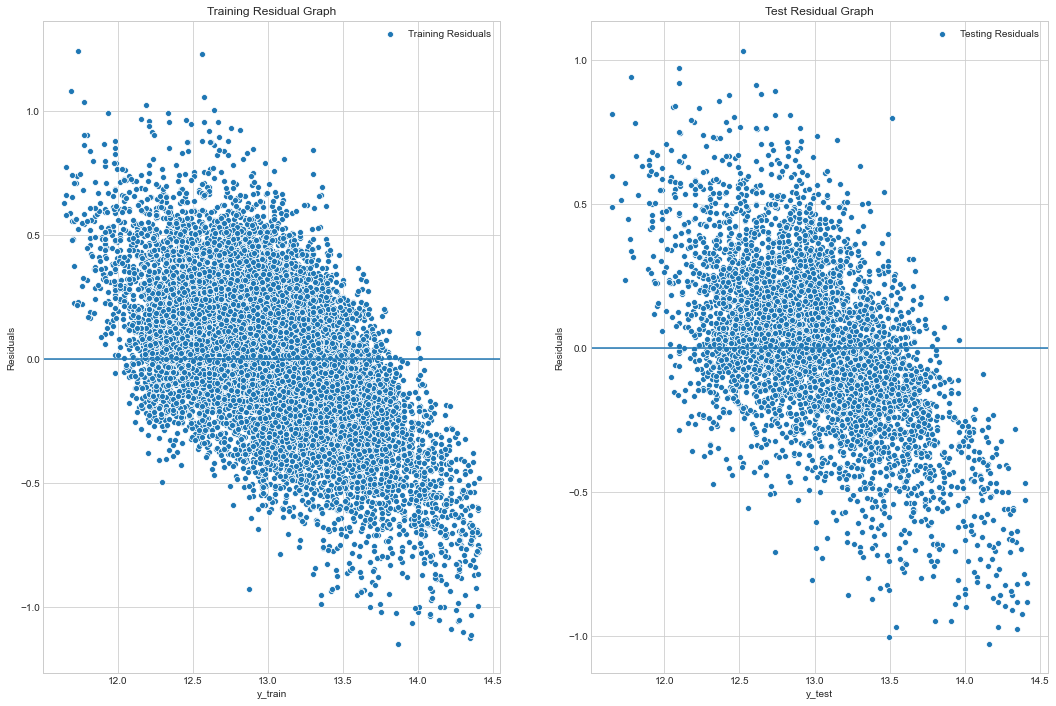

In [47]:
model2.validate_model()

> Observations
    - QQ-plots:
        - Both training and test results show relatively normal distribution of residuals.
    - Homoscedasticity
        - negative association with relatively uniform width tells us that the model is
            (1) biased - overestimates lower priced houses and underestimates higher priced houses.
            (2) homoscedastic
    - MSE and r2 scores
        - The values of MSE and r2 scores are relatively same for both train and test data. 
        - So our model has a good fit!

## Adding OHE
Now we will add categorical data and see how our model changes

In [48]:
model2.ohe()

*** OHE TIME ***
Column Name: waterfront
Number of unique values: 2
0.0    0.996586
1.0    0.003414
Name: waterfront, dtype: float64
Would you like to ohe column 'waterfront' (1-yes, 2-no, x-exit): 1
Column waterfront has been one-hot-encoded
1 columns have been added.
Total number of columns: 22
Column Name: view
Number of unique values: 5
0.0    0.910999
2.0    0.042653
3.0    0.020039
1.0    0.016345
4.0    0.009964
Name: view, dtype: float64
Would you like to ohe column 'view' (1-yes, 2-no, x-exit): 1
Column view has been one-hot-encoded
4 columns have been added.
Total number of columns: 26
Column Name: condition
Number of unique values: 5
3    0.630675
4    0.276015
5    0.085195
2    0.006997
1    0.001120
Name: condition, dtype: float64
Would you like to ohe column 'condition' (1-yes, 2-no, x-exit): 1
Column condition has been one-hot-encoded
4 columns have been added.
Total number of columns: 30
Column Name: grade
Number of unique values: 10
7     0.450266
8     0.273776
9    

In [49]:
# Fixes column names so that they can be used in OLS formula
model2.fix_col_names()

In [50]:
model2.split()

Shape of X_train: (13398, 25)
Shape of X_test: (4467, 25)
Shape of y_train: (13398,)
Shape of y_test: (4467,)


In [51]:
model2.regression()

Formula:
price ~ bedrooms + bathrooms + sqft_living + lat + long + sqft_lot15 + age + waterfront_10 + view_10 + view_20 + view_30 + view_40 + condition_2 + condition_3 + condition_4 + condition_5 + grade_5 + grade_6 + grade_7 + grade_8 + grade_9 + grade_10 + grade_11 + grade_12 + grade_13


In [14]:
model2.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     802.0
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:20:02   Log-Likelihood:                -965.06
No. Observations:               13243   AIC:                             1992.
Df Residuals:                   13212   BIC:                             2224.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.4448      0.100     74.209      0.000       7.248       7.641
sqft_lot             -0.1663      0.014    -11.592      0.000      -0.194      -0.138
sqft_living           0.7037      0.009     75.389      0.000       0.685       0.722
age                   0.2146      0.014     15.012      0.000       0.187       0.243
lat                   0.2158      0.002     90.401      0.000       0.211       0.221
long                  0.0195      0.003      7.144      0.000       0.014       0.025
bedrooms_2           -0.0503      0.025     -2.028      0.043      -0.099      -0.002
bedrooms_3           -0.1230      0.025     -4.945      0.000      -0.172      -0.074
bedrooms_4           -0.1476      0.026     -5.740      0.000      -0.198      -0.097
bedrooms_5           -0.2030      0.027     -7.426      0.000      -0.257      -0.149
bedrooms_6           -0.2619      0.035     -7.570      0.000      -0.330      -0.194
bedrooms_7           -0.3640      0.067     -5.450      0.000      -0.495      -0.233
bedrooms_8           -0.3436      0.153     -2.250      0.024      -0.643      -0.044
bedrooms_9           -0.1833      0.186     -0.984      0.325      -0.549       0.182
bedrooms_10       -6.052e-16   2.11e-16     -2.863      0.004   -1.02e-15   -1.91e-16
bedrooms_11          -0.4641      0.262     -1.770      0.077      -0.978       0.050
bedrooms_33           0.1041      0.262      0.398      0.691      -0.409       0.617
floors_15             0.0476      0.009      5.277      0.000       0.030       0.065
floors_20             0.1134      0.007     16.676      0.000       0.100       0.127
floors_25             0.1821      0.033      5.579      0.000       0.118       0.246
floors_30             0.1647      0.015     10.932      0.000       0.135       0.194
floors_35             0.2138      0.117      1.829      0.067      -0.015       0.443
waterfront_10         0.3298      0.070      4.682      0.000       0.192       0.468
view_10               0.1850      0.019      9.491      0.000       0.147       0.223
view_20               0.2017      0.012     16.214      0.000       0.177       0.226
view_30               0.2318      0.020     11.542      0.000       0.192       0.271
view_40               0.3992      0.034     11.679      0.000       0.332       0.466
condition_2           0.1709      0.080      2.131      0.033       0.014       0.328
condition_3           0.2623      0.076      3.465      0.001       0.114       0.411
condition_4           0.3198      0.076      4.224      0.000       0.171       0.468
condition_5           0.3620      0.076      4.764      0.000       0.213       0.511
yr_renovated_True     0.0593      0.014      4.300      0.000       0.032       0.086
=========================================================================

> Observations
    - r_2_score = 0.646 is an 'okay' value that can be used for interpretation of the model.
    - Not so hot in predicting outcomes
    - Biggest affectors:
        - sqft_living - more space more price
        - Intercept - tells us that houeses are just expensive
        - Latitude - seems like high land value areas are somewhat dependant on latitude
    - Negative affectors:
        - sqft_lot : seems like having a big lot isn't a good thing after all according to this model

Train MSE = 0.05950142343009895	Train R2 = 0.7479750805468741
Test MSE = 0.05850683584737149	Test R2 = 0.7438472273494573


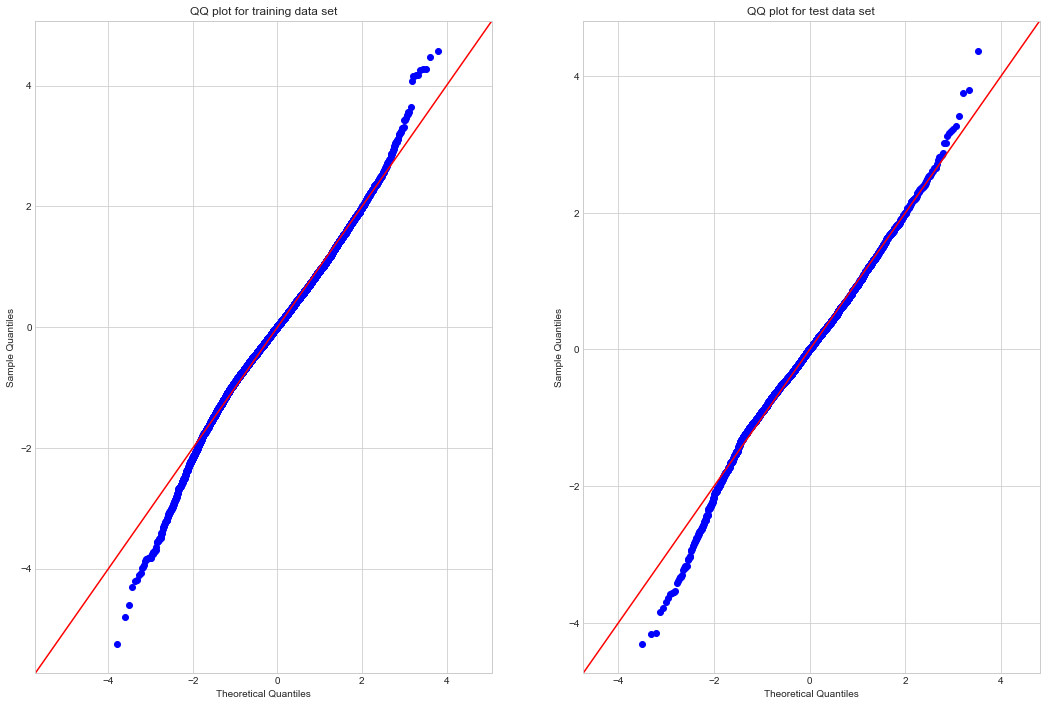

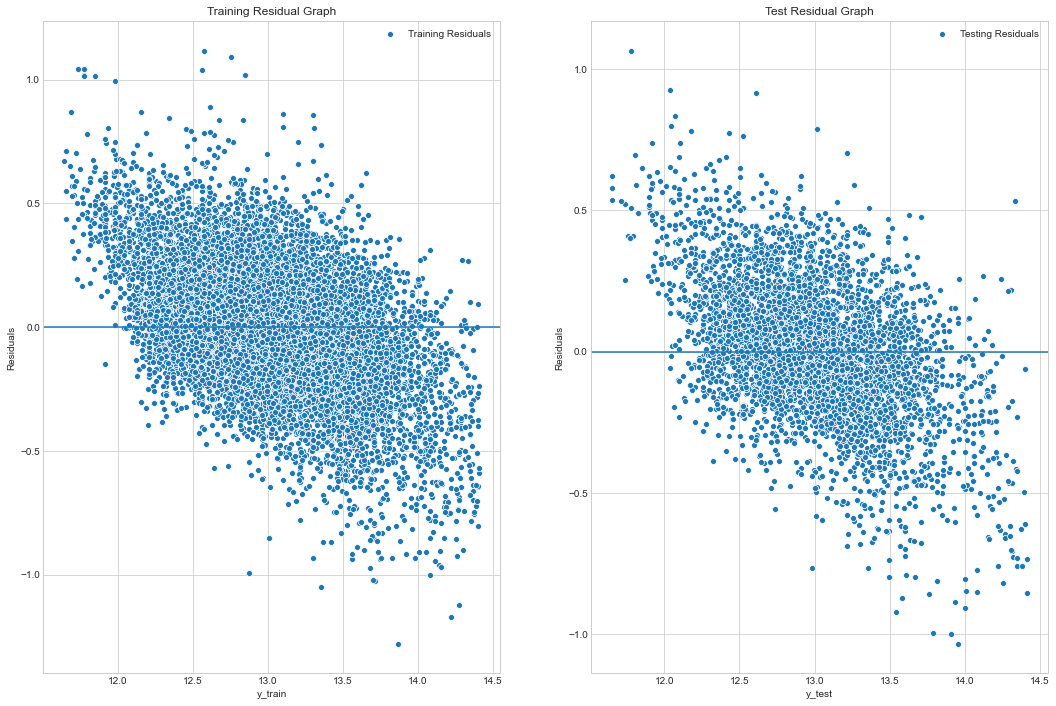

In [52]:
model2.validate_model()

> Observations
    - QQ-plots:
        - Both training and test results show relatively normal distribution of residuals.
    - Homoscedasticity
        - negative association with relatively uniform width tells us that the model is
            (1) biased - overestimates lower priced houses and underestimates higher priced houses.
            (2) homoscedastic
    - MSE and r2 scores
        - The values of MSE and r2 scores are relatively same for both train and test data. 
        - So our model has a good fit!

## Question

> Questions
    3. Will getting rid of more columns help in making the model "better" using VIF and p-values?

In [6]:
# Quick Save
# shb.save_data(model2, name='model2_after_ohe')
model2 = shb.load_data(name='model2_after_ohe')

In [7]:
print(model2)

Model Information
Shape:	(17865, 39)
Perecent Retained:	82.72
Dropped columns:	['id', 'sqft_lot', 'floors', 'yr_renovated', 'zipcode', 'sqft_above', 'sqft_living15']
Categorical columns:	['waterfront', 'view', 'condition', 'grade']
Contiuous columns:	['price', 'bedrooms', 'bathrooms', 'sqft_living', 'lat', 'long', 'sqft_lot15', 'age']
Number of OHE columns:	18
Train MSE = 0.05950142343009895	Train R2 = 0.7479750805468741
Test MSE = 0.05850683584737149	Test R2 = 0.7438472273494573
Model Information Completed


### Getting rid of columns using VIF and p-values

In [ ]:
# Use VIF to cut off columns
model2.multicolinearity()

In [25]:
print(model2)

Model Information
Shape:	(17658, 31)
Perecent Retained:	81.761
Dropped columns:	['sqft_living15', 'sqft_above', 'id', 'sqft_lot15', 'date', 'sqft_basement', 'bathrooms', 'grade']
Categorical columns:	['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'yr_renovated']
Contiuous columns:	['price', 'sqft_lot', 'sqft_living', 'age', 'lat', 'long']
Number of OHE columns:	18
Train MSE = 0.0677364508588784	Train R2 = 0.645531450644246
Test MSE = 0.0698640877711337	Test R2 = 0.6466558594170471
Model Information Completed


In [15]:
# drop columns that have p-value > 0.05
model2.p_value_cut_off()

        variables       p_value
14       grade_13  5.388720e-03
13       grade_12  8.630966e-04
5            long  2.421756e-09
8   waterfront_10  1.324112e-11
9         view_10  1.256138e-28
6      sqft_lot15  2.145985e-37
1        bedrooms  3.814800e-40
12        view_40  4.450237e-41
2       bathrooms  5.642587e-52
11        view_30  3.448066e-53
Write cut-off p-value (Usually 0.05, Enter "x" to exit): 0.05
[]
0 columns have been DELETED!
There are now 28 columns in the data.


### Model #3 - Final

In [16]:
model2.split()

Shape of X_train: (13398, 14)
Shape of X_test: (4467, 14)
Shape of y_train: (13398,)
Shape of y_test: (4467,)


In [17]:
model2.regression()

Formula:
price ~ bedrooms + bathrooms + sqft_living + lat + long + sqft_lot15 + age + waterfront_10 + view_10 + view_20 + view_30 + view_40 + grade_12 + grade_13


In [18]:
model2.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     1953.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:18:54   Log-Likelihood:                -1885.1
No. Observations:               13398   AIC:                             3800.
Df Residuals:                   13383   BIC:                             3913.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.0225      0.089     90.417      0.000       7.849       8.196
bedrooms         -0.0485      0.004    -13.307      0.000      -0.056      -0.041
bathrooms         0.0724      0.005     15.235      0.000       0.063       0.082
sqft_living       0.7469      0.011     67.849      0.000       0.725       0.768
lat               0.2124      0.002     85.677      0.000       0.208       0.217
long              0.0191      0.003      5.971      0.000       0.013       0.025
sqft_lot15       -0.0735      0.006    -12.818      0.000      -0.085      -0.062
age               0.0812      0.003     24.268      0.000       0.075       0.088
waterfront_10     0.3424      0.051      6.772      0.000       0.243       0.442
view_10           0.2128      0.019     11.126      0.000       0.175       0.250
view_20           0.2026      0.012     16.441      0.000       0.178       0.227
view_30           0.2748      0.018     15.420      0.000       0.240       0.310
view_40           0.3810      0.028     13.468      0.000       0.326       0.436
grade_12          0.2954      0.089      3.332      0.001       0.122       0.469
grade_13          0.7760      0.279      2.783      0.005       0.229       1.322
==============================================================================
Omnibus:                      168.422   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.796
Skew:                           0.132   Prob(JB):                     2.85e-56
Kurtosis:                       3.623   Cond. No.                     1.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train MSE = 0.07757704478596485	Train R2 = 0.671413769007344
Test MSE = 0.07710740688891637	Test R2 = 0.66241079729529


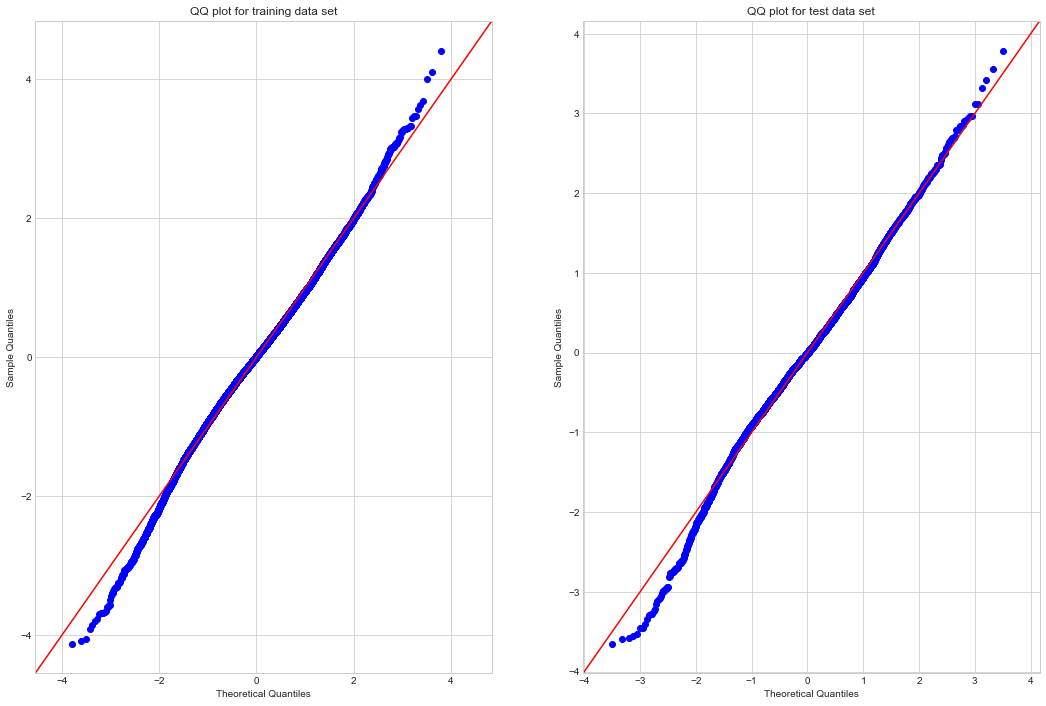

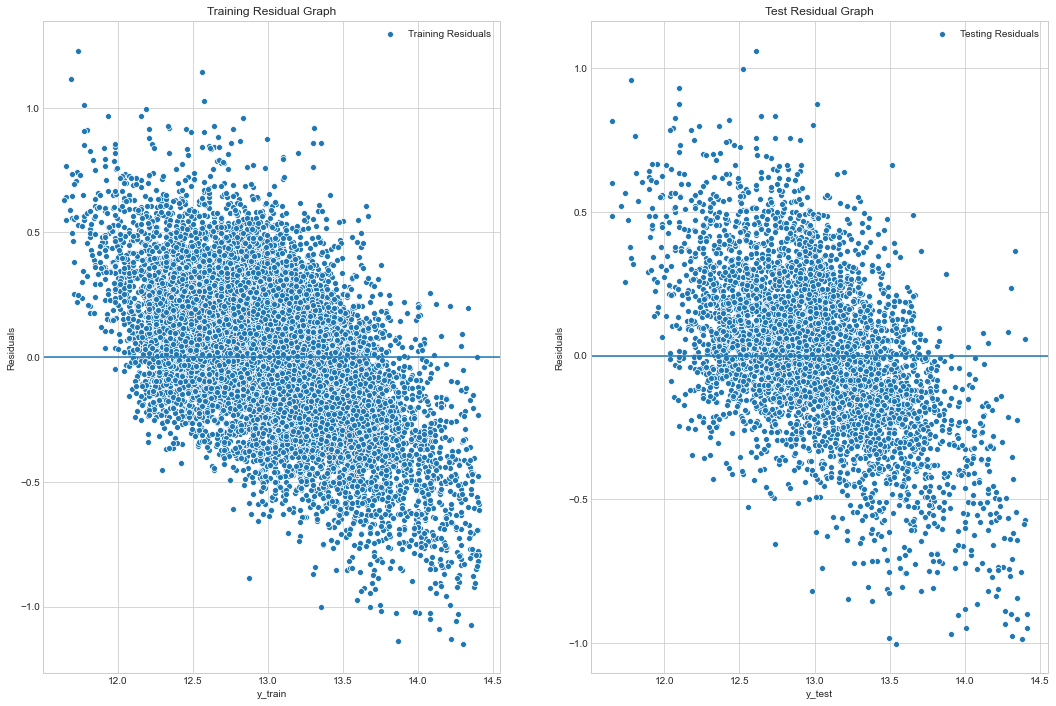

In [19]:
model2.validate_model()

> Observation
    - By dropping columns using VIF and p-values, the r2-value increased.

> Observations
    - r_2_score = 0.636 is an 'okay' value that can be used for interpretation of the model.
    - Not so hot in predicting outcomes
    - Biggest affectors:
        - sqft_living - more space more price
        - Intercept - tells us that houeses are just expensive
        - Latitude - seems like high land value areas are somewhat dependant on latitude
    - Negative affectors:
        - sqft_lot : seems like having a big lot isn't a good thing after all according to this model


### A Quick Save

In [21]:
# saves the current model data
shb.save_data(model2, name='model_2_final')
## Testing out whether it saves the data or not by loading it to another variable.
# model2 = shb.load_data(name='model_2_with_ohe')

# Model #3 - Final

Plan
    1. create new columns
        - age = current year - year built
        - bath_div_bed = number of bath / number of bed
        - grade_x_sqft_living = grade x sqft_living
        - view_x_lot = view x lot
    2. Continuous columns
        - exclude latitude and longitude
    3. Categorical
        - exclude all the categorical columns that will be used to create new columns

In [74]:
model3 = MakeModel(df)

## Scrubing

In [75]:
# waterfront: fillnas with 0s. view:fillnas with mode
model3.imuter('waterfront', option=0)
model3.imuter('view', option='mode')

Number of nulls:  0
None
Number of nulls:  0
None


## Creating new features

In [76]:
model3.data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [77]:
# yr_renovated into booleans
model3.data['yr_renovated'] = model3.data['yr_renovated']>1000
# Create a new column 'age' and drop 'yr_built'
model3.data['age'] = 2019 - model3.data['yr_built']
model3.data.drop(columns='yr_built', axis=1, inplace=True)

In [46]:
# print(model3)

In [78]:
# # Bath_div_bed
model3.data['bath_and_bed'] = model3.data['bathrooms'] + model3.data['bedrooms']
# model3.data['bath_x_bed'] = model3.data['bathrooms'] * model3.data['bedrooms']
# model3.data['sqft_living_div_bedrooms'] = model3.data['sqft_living'] / model3.data['bedrooms']

# Grade x sqft_living
model3.data['grade_x_bathrooms'] = model3.data['grade'] * model3.data['bathrooms']

# model3.data['view_x_sqft_lot'] = (model3.data['view']+1.0) * model3.data['sqft_lot']

In [79]:
cat_cols = ['waterfront', 'yr_renovated', 'bathrooms', 'grade']

cont_cols = ['price', 'sqft_living', 'bath_and_bed', 'grade_x_bathrooms','lat', 'long']

model3.set_cols(cat=cat_cols, cont=cont_cols)

['sqft_lot15', 'bedrooms', 'sqft_living15', 'id', 'date', 'zipcode', 'view', 'sqft_above', 'age', 'sqft_lot', 'condition', 'sqft_basement', 'floors']
13 columns have been DELETED!
There are now 10 columns in the data.
Model Information
Shape:	(21597, 10)
Perecent Retained:	100
Dropped columns:	['sqft_lot15', 'bedrooms', 'sqft_living15', 'id', 'date', 'zipcode', 'view', 'sqft_above', 'age', 'sqft_lot', 'condition', 'sqft_basement', 'floors']
Categorical columns:	['waterfront', 'yr_renovated', 'bathrooms', 'grade']
Contiuous columns:	['price', 'sqft_living', 'bath_and_bed', 'grade_x_bathrooms', 'lat', 'long']
Number of OHE columns:	0
Train MSE = None	Train R2 = None
Test MSE = None	Test R2 = None


In [49]:
# Categorize each col into either categorical, continous or just drop
# Also check for linearity between each variable vs. price (target)
# model3.col_classifier()


In [50]:
print(model3)

Model Information
Shape:	(21597, 10)
Perecent Retained:	100
Dropped columns:	['sqft_lot15', 'bedrooms', 'sqft_living15', 'id', 'time', 'date', 'zipcode', 'view', 'sqft_above', 'age', 'sqft_lot', 'condition', 'sqft_basement', 'floors']
Categorical columns:	['waterfront', 'yr_renovated', 'bathrooms', 'grade']
Contiuous columns:	['price', 'sqft_living', 'bath_and_bed', 'grade_x_bathrooms', 'lat', 'long']
Number of OHE columns:	0
Train MSE = None	Train R2 = None
Test MSE = None	Test R2 = None
Model Information Completed


In [331]:
shb.save_data(model3, name='model3_1')
# model3 = shb.load_data(name='model3_1')

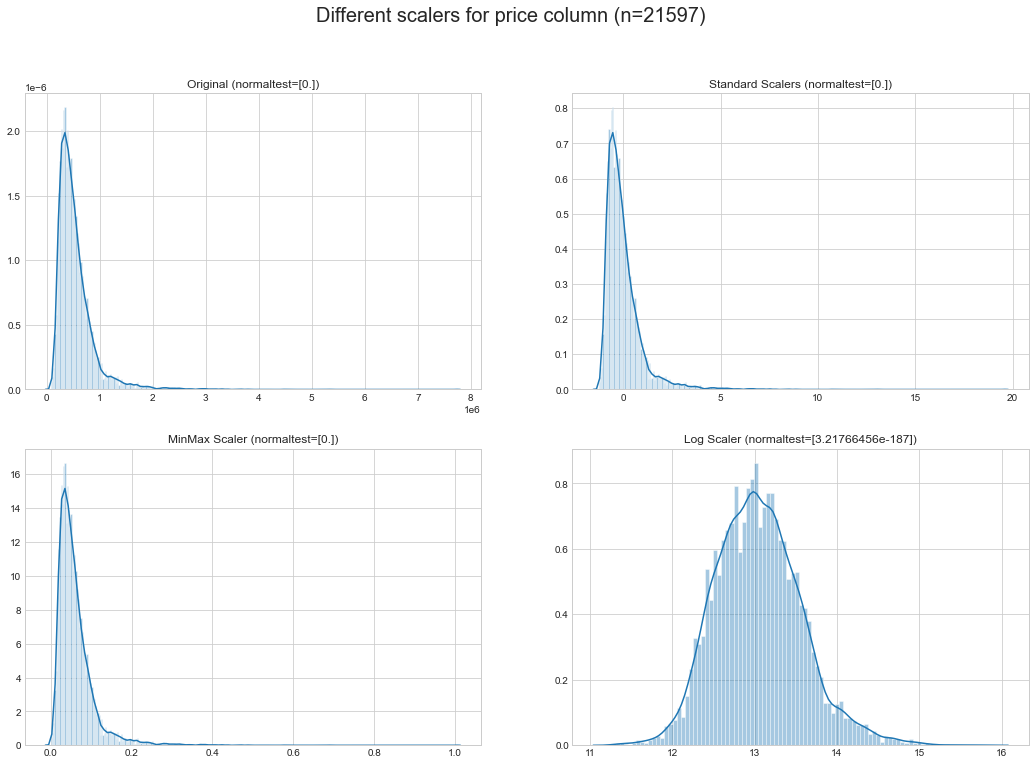

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


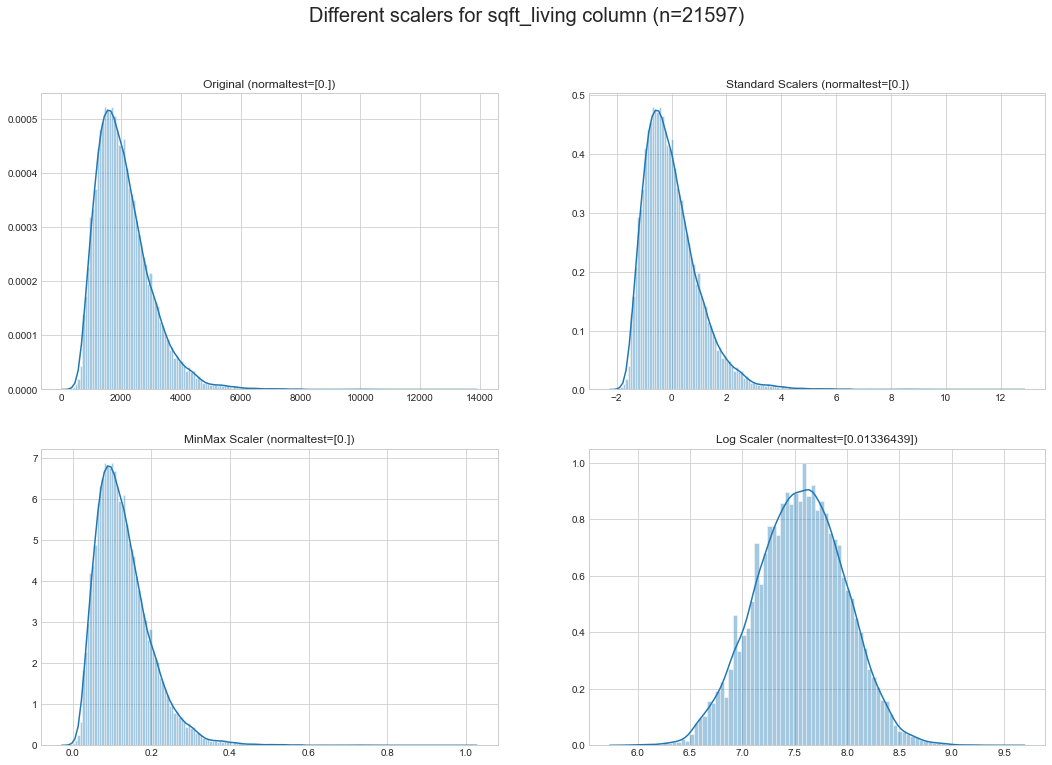

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


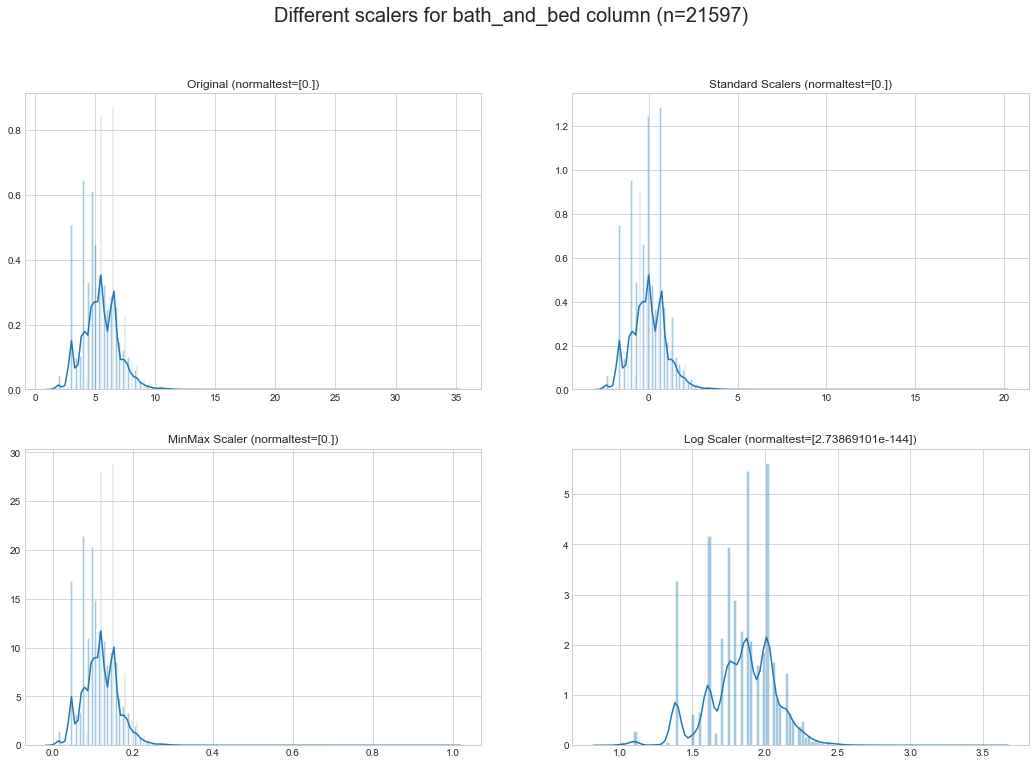

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


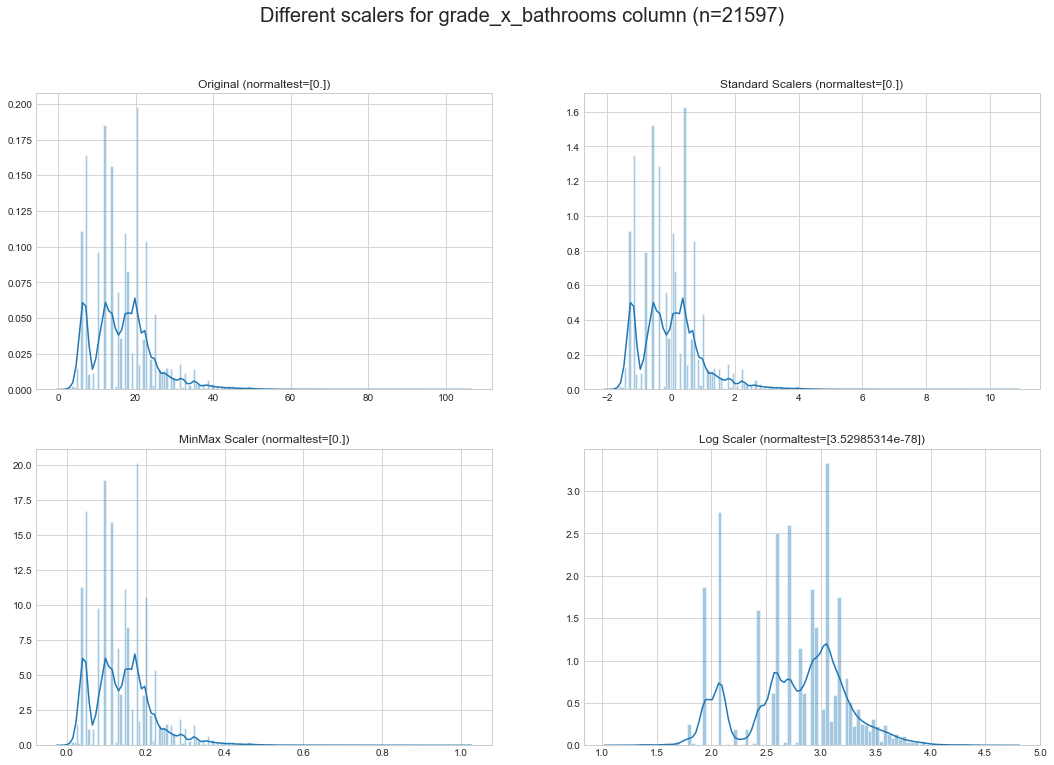

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


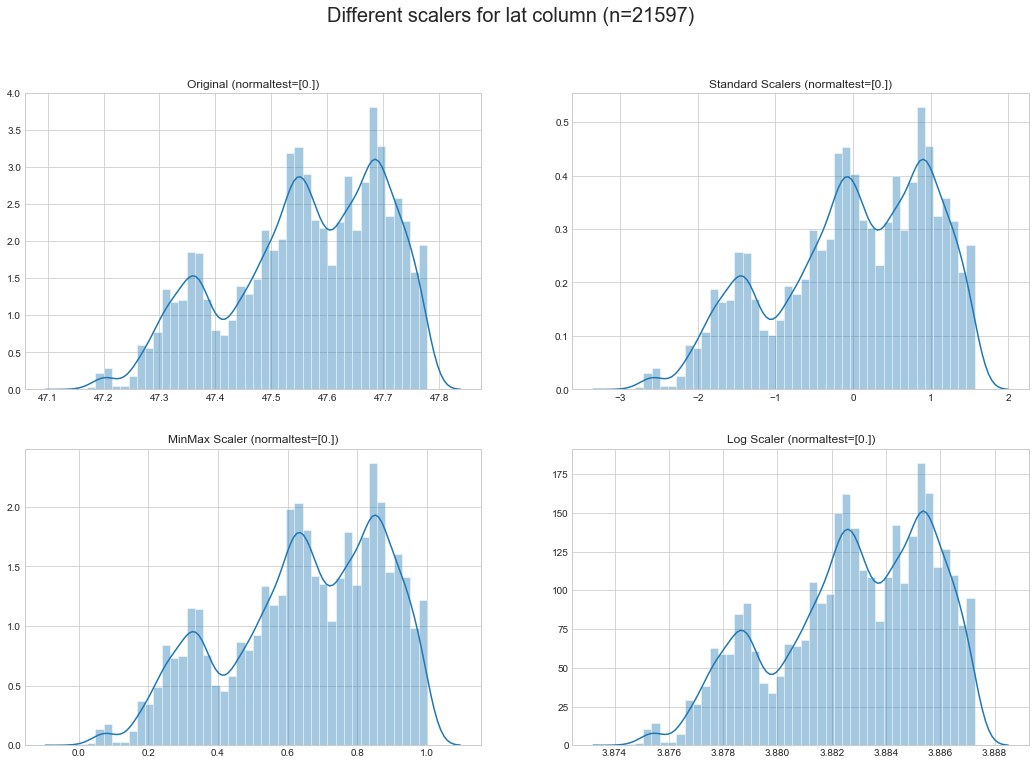

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 2
Error occured


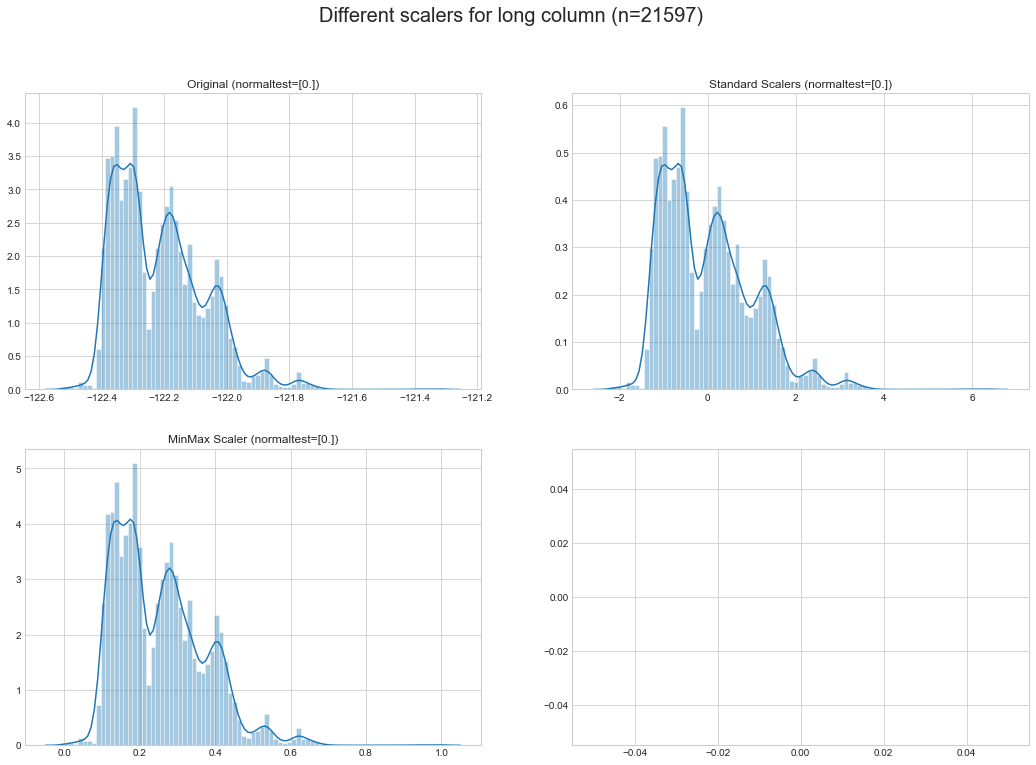

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 2


In [80]:
for col in model3.cont_cols:
    model3.scaler(col)

In [81]:
model3.transformers

{'price': FunctionTransformer(accept_sparse=False, check_inverse=True,
                     func=<ufunc 'log1p'>, inv_kw_args=None, inverse_func=None,
                     kw_args=None, pass_y='deprecated', validate=True),
 'sqft_living': FunctionTransformer(accept_sparse=False, check_inverse=True,
                     func=<ufunc 'log1p'>, inv_kw_args=None, inverse_func=None,
                     kw_args=None, pass_y='deprecated', validate=True),
 'bath_and_bed': FunctionTransformer(accept_sparse=False, check_inverse=True,
                     func=<ufunc 'log1p'>, inv_kw_args=None, inverse_func=None,
                     kw_args=None, pass_y='deprecated', validate=True),
 'grade_x_bathrooms': FunctionTransformer(accept_sparse=False, check_inverse=True,
                     func=<ufunc 'log1p'>, inv_kw_args=None, inverse_func=None,
                     kw_args=None, pass_y='deprecated', validate=True),
 'lat': StandardScaler(copy=True, with_mean=True, with_std=True),
 'long': Standard

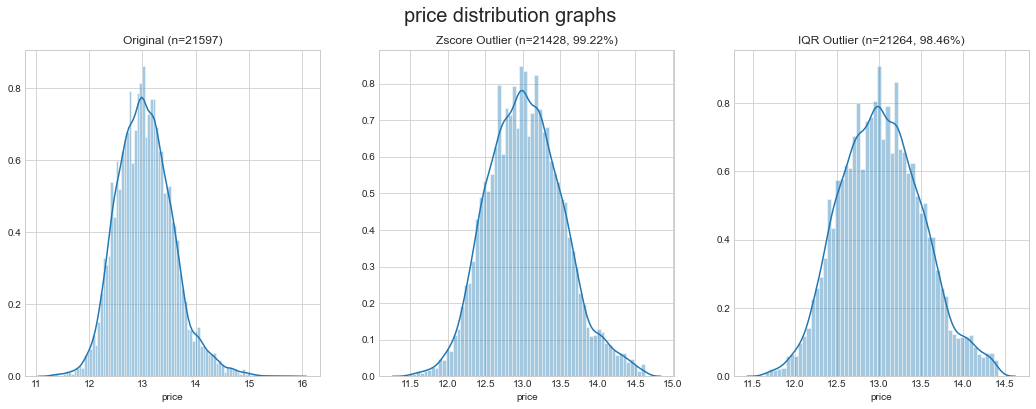

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 2


169 number of data have been removed by this process.

So far we have 99.217% of original data.


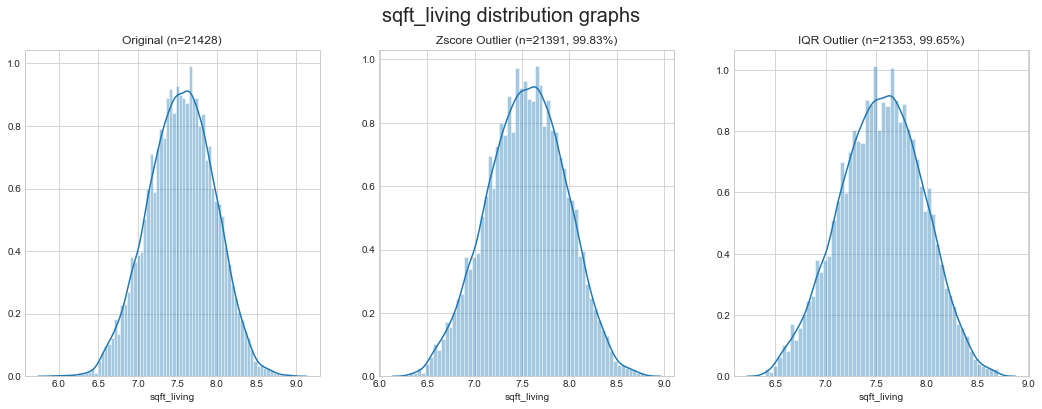

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


75 number of data have been removed by this process.

So far we have 98.87% of original data.


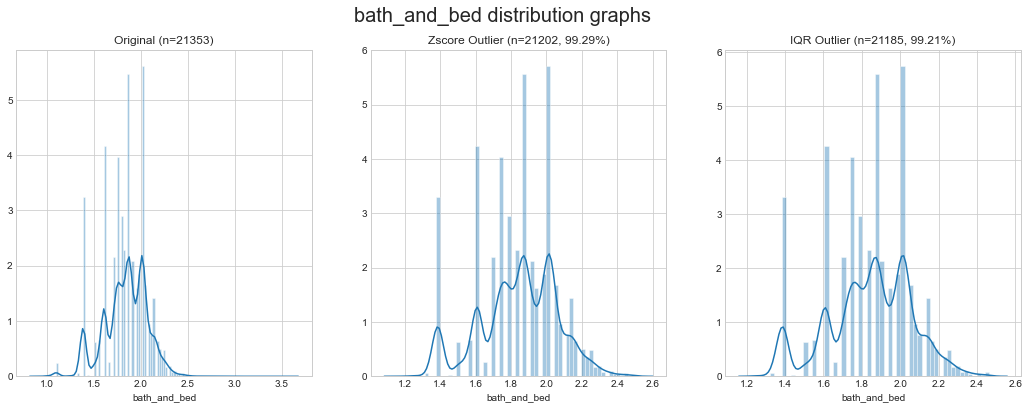

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


168 number of data have been removed by this process.

So far we have 98.092% of original data.


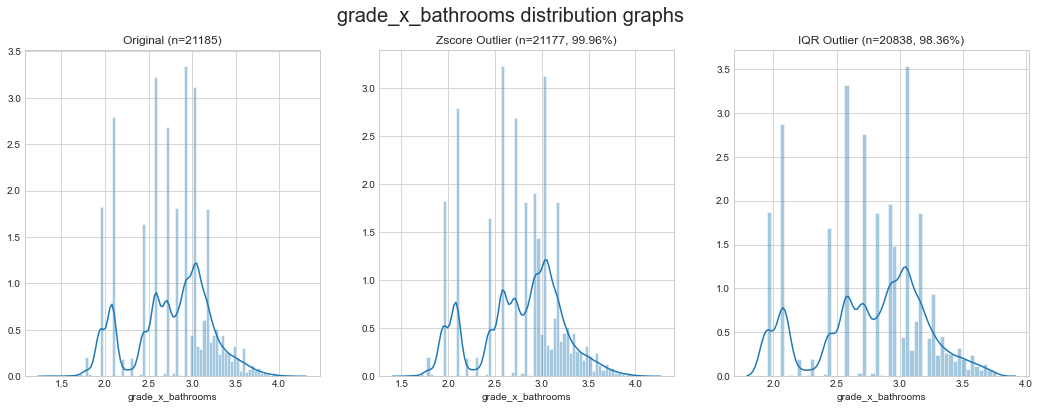

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


347 number of data have been removed by this process.

So far we have 96.486% of original data.


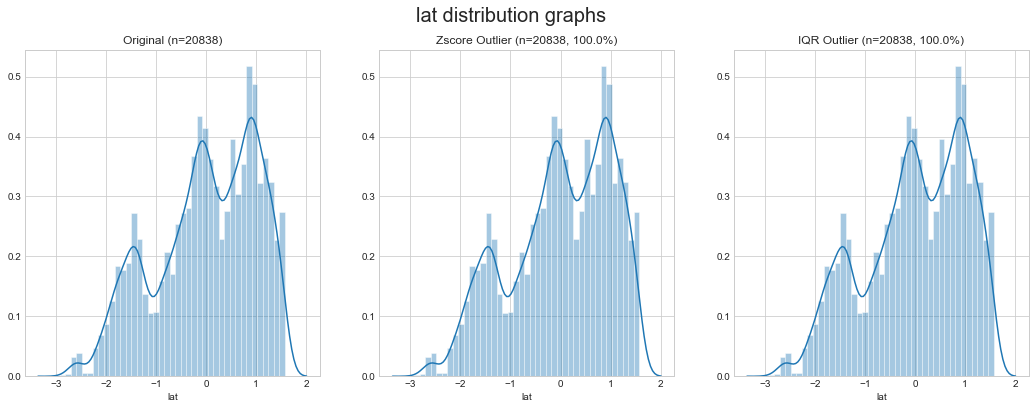

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 2


0 number of data have been removed by this process.

So far we have 96.486% of original data.


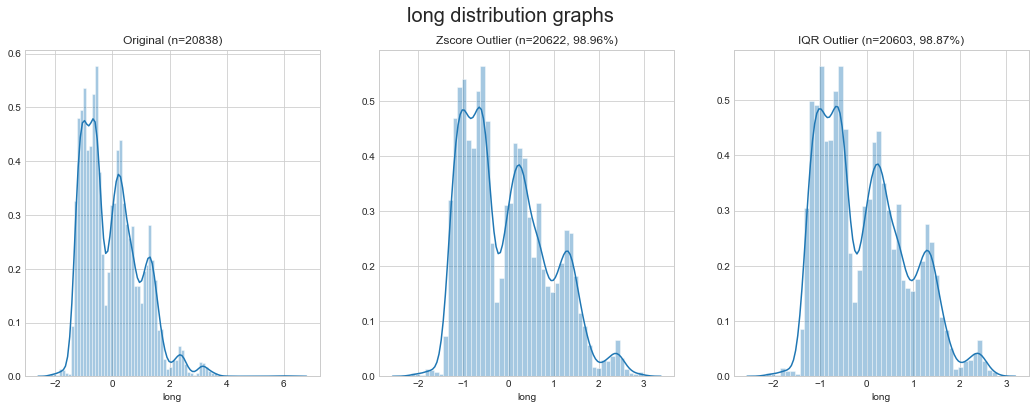

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


235 number of data have been removed by this process.

So far we have 95.398% of original data.


In [82]:
for col in model3.cont_cols:
    model3.outlier(col)

In [53]:
# QUick save
shb.save_data(model3, name='model3_scrub_done')

In [280]:
# model3 = shb.load_data(name='model3_scrub_done')

## OHE

In [83]:
model3.ohe()1

*** OHE TIME ***
Column Name: waterfront
Number of unique values: 2
0.0    0.995195
1.0    0.004805
Name: waterfront, dtype: float64
Would you like to ohe column 'waterfront' (1-yes, 2-no, x-exit): 1
Column waterfront has been one-hot-encoded
1 columns have been added.
Total number of columns: 11
Column Name: yr_renovated
Number of unique values: 2
False    0.966316
True     0.033684
Name: yr_renovated, dtype: float64
Would you like to ohe column 'yr_renovated' (1-yes, 2-no, x-exit): 1
Column yr_renovated has been one-hot-encoded
1 columns have been added.
Total number of columns: 12
Column Name: bathrooms
Number of unique values: 16
2.50    0.257438
1.00    0.169927
1.75    0.145416
2.25    0.098238
2.00    0.092414
1.50    0.069359
2.75    0.056497
3.00    0.035577
3.50    0.034267
3.25    0.027278
3.75    0.006747
4.00    0.003980
4.50    0.001602
4.25    0.000825
1.25    0.000340
4.75    0.000097
Name: bathrooms, dtype: float64
Would you like to ohe column 'bathrooms' (1-yes, 2-no,

In [84]:
print(model3)

Model Information
Shape:	(20603, 20)
Perecent Retained:	95.398
Dropped columns:	['sqft_lot15', 'bedrooms', 'sqft_living15', 'id', 'date', 'zipcode', 'view', 'sqft_above', 'age', 'sqft_lot', 'condition', 'sqft_basement', 'floors', 'bathrooms']
Categorical columns:	['waterfront', 'yr_renovated', 'grade']
Contiuous columns:	['price', 'sqft_living', 'bath_and_bed', 'grade_x_bathrooms', 'lat', 'long']
Number of OHE columns:	10
Train MSE = None	Train R2 = None
Test MSE = None	Test R2 = None
Model Information Completed


In [85]:
model3.fix_col_names()

## Model

In [86]:
model3.split()

Shape of X_train: (15452, 15)
Shape of X_test: (5151, 15)
Shape of y_train: (15452,)
Shape of y_test: (5151,)


In [87]:
model3.regression()

Formula:
price ~ sqft_living + bath_and_bed + grade_x_bathrooms + lat + long + waterfront_10 + yr_renovated_True + grade_5 + grade_6 + grade_7 + grade_8 + grade_9 + grade_10 + grade_11 + grade_12


In [59]:
# model3.drop_ohe_cols()

In [88]:
model3.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     2354.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:20:20   Log-Likelihood:                -1699.6
No. Observations:               15452   AIC:                             3431.
Df Residuals:                   15436   BIC:                             3554.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.5373      0.276     34.507      0.000       8.996      10.079
sqft_living           0.5345      0.011     50.497      0.000       0.514       0.555
bath_and_bed         -0.1488      0.021     -7.026      0.000      -0.190      -0.107
grade_x_bathrooms     0.0256      0.013      2.048      0.041       0.001       0.050
lat                   0.2000      0.002     90.871      0.000       0.196       0.204
long                 -0.0352      0.002    -14.105      0.000      -0.040      -0.030
waterfront_10         0.5581      0.032     17.182      0.000       0.494       0.622
yr_renovated_True     0.1710      0.012     14.034      0.000       0.147       0.195
grade_5              -0.6793      0.275     -2.473      0.013      -1.218      -0.141
grade_6              -0.5558      0.270     -2.055      0.040      -1.086      -0.026
grade_7              -0.4523      0.270     -1.673      0.094      -0.982       0.078
grade_8              -0.3011      0.270     -1.113      0.266      -0.831       0.229
grade_9              -0.1028      0.271     -0.380      0.704      -0.633       0.428
grade_10              0.0558      0.271      0.206      0.837      -0.475       0.587
grade_11              0.1753      0.271      0.646      0.518      -0.357       0.707
grade_12              0.3515      0.277      1.268      0.205      -0.192       0.895
==============================================================================
Omnibus:                      218.528   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.286
Skew:                           0.188   Prob(JB):                     1.69e-65
Kurtosis:                       3.567   Cond. No.                     3.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train MSE = 0.07295644705095775	Train R2 = 0.6958074826484012
Test MSE = 0.0738166215538923	Test R2 = 0.6943418071660402


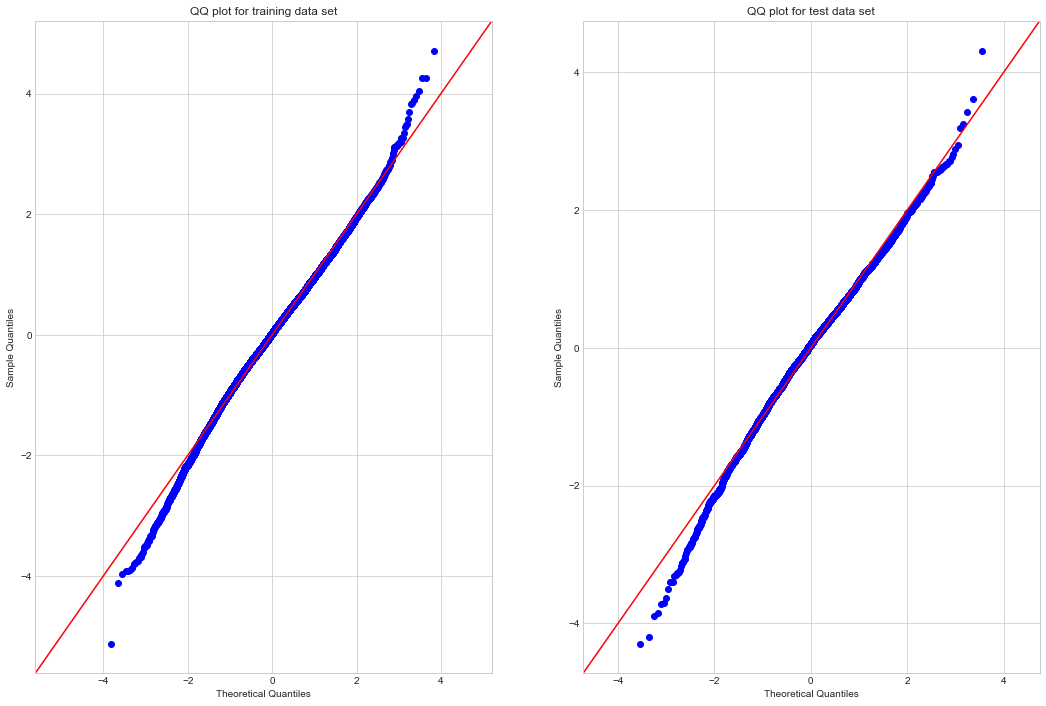

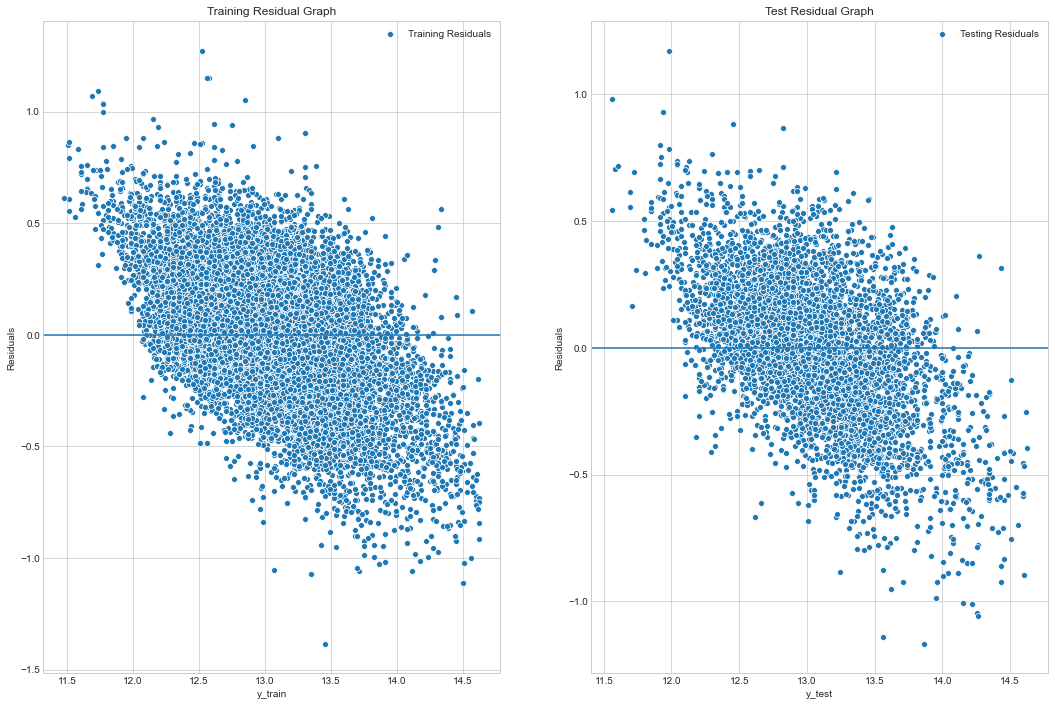

In [89]:
model3.validate_model()

In [90]:
model3.p_value_cut_off()

            variables       p_value
13           grade_10  8.365987e-01
12            grade_9  7.039745e-01
14           grade_11  5.183519e-01
11            grade_8  2.656281e-01
15           grade_12  2.047121e-01
10            grade_7  9.437504e-02
3   grade_x_bathrooms  4.057238e-02
9             grade_6  3.986558e-02
8             grade_5  1.341855e-02
2        bath_and_bed  2.210952e-12
Write cut-off p-value (Usually 0.05, Enter "x" to exit): 0.05
6 columns have been DELETED!
There are now 14 columns in the data.


In [91]:
print(model3)

Model Information
Shape:	(20603, 14)
Perecent Retained:	95.398
Dropped columns:	['sqft_lot15', 'bedrooms', 'sqft_living15', 'id', 'date', 'zipcode', 'view', 'sqft_above', 'age', 'sqft_lot', 'condition', 'sqft_basement', 'floors', 'bathrooms']
Categorical columns:	['waterfront', 'yr_renovated', 'grade']
Contiuous columns:	['price', 'sqft_living', 'bath_and_bed', 'grade_x_bathrooms', 'lat', 'long']
Number of OHE columns:	4
Train MSE = 0.07295644705095775	Train R2 = 0.6958074826484012
Test MSE = 0.0738166215538923	Test R2 = 0.6943418071660402
Model Information Completed


In [92]:
model3.multicolinearity()


                    Options:
                    	1. Correlation Matrix
                    	2. Variance Inflation Factor (VIF)
                  
Choose which method you would like to determine multicolinearity variables: 2
           variables         VIF
0              const  626.647030
3  grade_x_bathrooms    4.095041
2       bath_and_bed    3.589194
1        sqft_living    3.157620
9            grade_6    1.334913
5               long    1.141952
4                lat    1.035099
6      waterfront_10    1.016165
7  yr_renovated_True    1.015786
8            grade_5    1.008790


Write cut-off value (Usually 7, x-exit): 7
0 columns have been DELETED!
There are now 14 columns in the data.
           variables         VIF
0              const  626.647030
3  grade_x_bathrooms    4.095041
2       bath_and_bed    3.589194
1        sqft_living    3.157620
9            grade_6    1.334913
5               long    1.141952
4                lat    1.035099
6      waterfront_10    1.016165
7 

In [93]:
model3.split()
model3.regression()
model3.model.summary()

Shape of X_train: (15452, 9)
Shape of X_test: (5151, 9)
Shape of y_train: (15452,)
Shape of y_test: (5151,)
Formula:
price ~ sqft_living + bath_and_bed + grade_x_bathrooms + lat + long + waterfront_10 + yr_renovated_True + grade_5 + grade_6


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     3259.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:23:03   Log-Likelihood:                -2670.4
No. Observations:               15452   AIC:                             5361.
Df Residuals:                   15442   BIC:                             5437.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.6091      0.058    132.090      0.000       7.496       7.722
sqft_living           0.7253      0.010     70.162      0.000       0.705       0.746
bath_and_bed         -0.5290      0.021    -25.631      0.000      -0.569      -0.489
grade_x_bathrooms     0.3320      0.011     30.700      0.000       0.311       0.353
lat                   0.2096      0.002     89.887      0.000       0.205       0.214
long                 -0.0341      0.003    -12.857      0.000      -0.039      -0.029
waterfront_10         0.5743      0.034     16.647      0.000       0.507       0.642
yr_renovated_True     0.1507      0.013     11.629      0.000       0.125       0.176
grade_5              -0.1441      0.052     -2.772      0.006      -0.246      -0.042
grade_6              -0.0102      0.009     -1.108      0.268      -0.028       0.008
==============================================================================
Omnibus:                      213.984   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.396
Skew:                           0.214   Prob(JB):                     1.42e-58
Kurtosis:                       3.480   Cond. No.                         211.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Train MSE = 0.08272464888179994	Train R2 = 0.6550788832574941
Test MSE = 0.08331622919673512	Test R2 = 0.6550060472298703


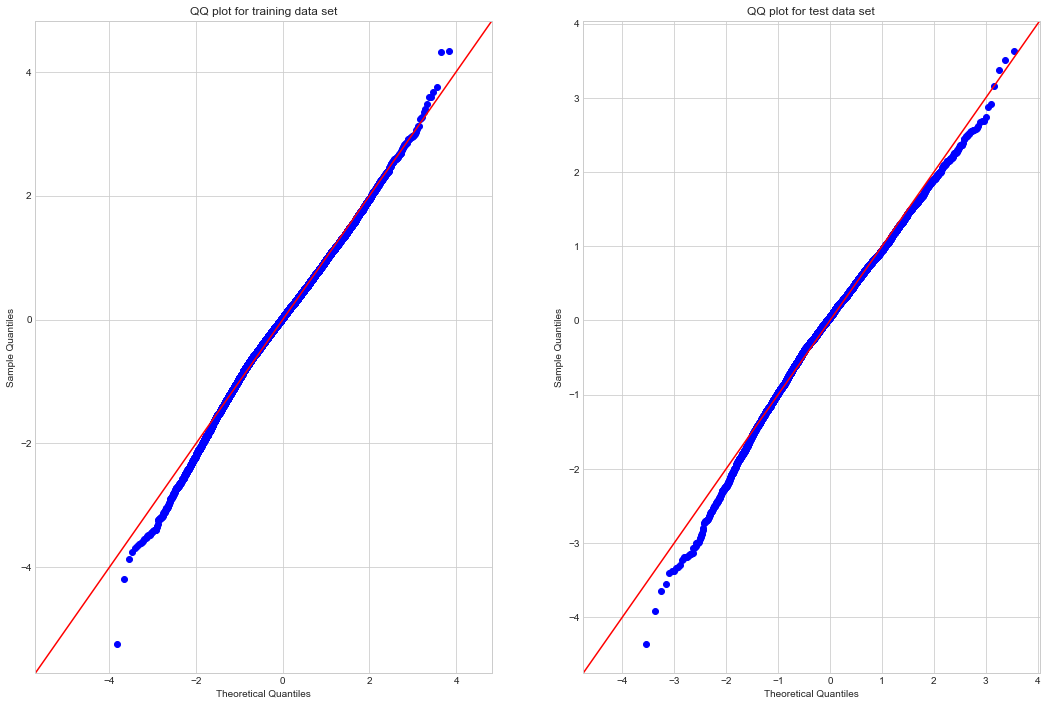

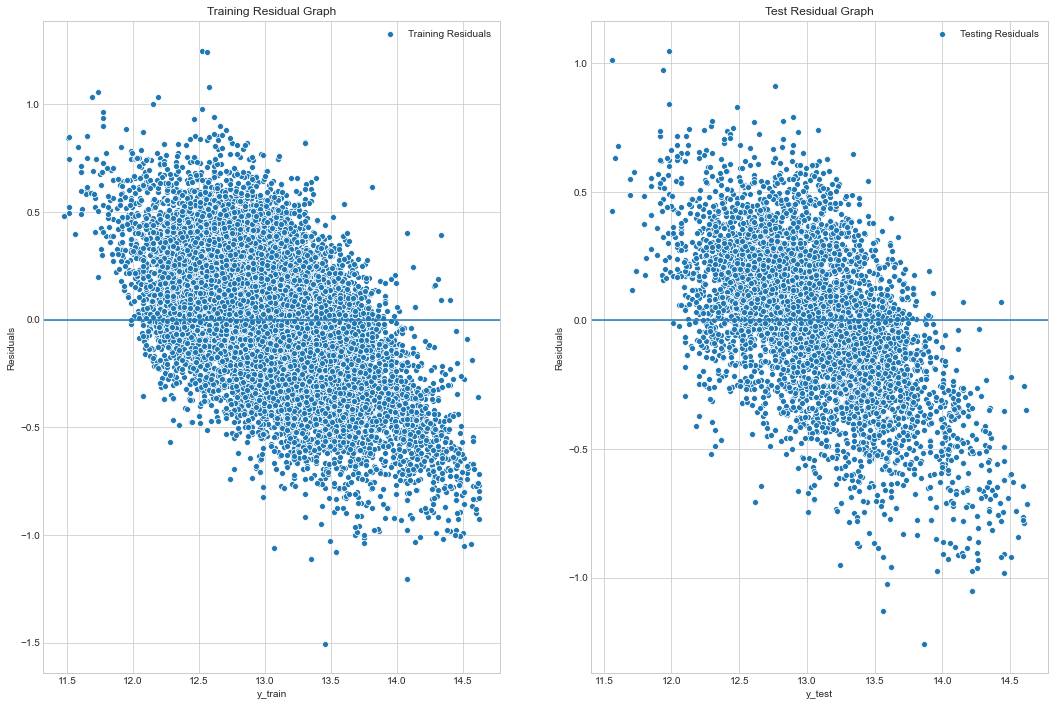

In [94]:
model3.validate_model()

In [95]:
shb.save_data(model3, name='model_3_final')

## Interpret

In [96]:
print(model3)

Model Information
Shape:	(20603, 14)
Perecent Retained:	95.398
Dropped columns:	['sqft_lot15', 'bedrooms', 'sqft_living15', 'id', 'date', 'zipcode', 'view', 'sqft_above', 'age', 'sqft_lot', 'condition', 'sqft_basement', 'floors', 'bathrooms']
Categorical columns:	['waterfront', 'yr_renovated', 'grade']
Contiuous columns:	['price', 'sqft_living', 'bath_and_bed', 'grade_x_bathrooms', 'lat', 'long']
Number of OHE columns:	4
Train MSE = 0.08272464888179994	Train R2 = 0.6550788832574941
Test MSE = 0.08331622919673512	Test R2 = 0.6550060472298703
Model Information Completed


> Obsevation
    - QQ-plots show normal distribution of residuals
    - Residual graphs show Homoscedasticity but biased
        - over estimates low priced houses and vice versa
    - R2 values are around 0.655 and 0.655 for train and test data, respectively
        - this model can be used to interpret rather than predict
        - to raise R2 value, we could add in more variables
        - similar r2 and mse values suggest that the model is not overfitting nor underfitting


# Final Final Model

In [99]:
# import 'kc_house_data.csv'
df = pd.read_csv('kc_house_data.csv')

## Adding in new features

### Geocode API set up

In [105]:
import googlemaps
# file containing googlemap api
from skey import keys
import attractionlist

In [114]:
gmaps_key = googlemaps.Client(key=keys['gmap_key'])

In [102]:
# # Defining park list dataframe
# park_df = pd.DataFrame(park_list, columns=['name'])

# park_df['lat'] = None
# park_df['long'] = None
# park_df

# # iterates through the list of parks in King's County and finds lat/long if possible.
# for i in range(0,len(park_df)):
#     geocode_result = gmaps_key.geocode(park_df.iat[i,0])
#     try:
#         lat = geocode_result[0]['geometry']['location']['lat']
#         long = geocode_result[0]['geometry']['location']['lng']
#         park_df.iat[i, park_df.columns.get_loc('lat')] = lat
#         park_df.iat[i, park_df.columns.get_loc('long')] = long
#     except:
#         lat = None
#         lon = None
# park_df.dropna(inplace=True)
# shb.save_data(park_df, name='data/park_df')
park_df = shb.load_data(name='data/park_df')

In [107]:
# # Defining attraction list dataframe
# top_parks = pd.DataFrame(attractionlist.top_parks,
#                            columns=['name'])
# top_parks['type'] = 'park'

# top_beaches = pd.DataFrame(attractionlist.top_beaches,
#                            columns=['name'])
# top_beaches['type'] = 'beach'

# top_cafes = pd.DataFrame(attractionlist.top_cafes,
#                            columns=['name'])
# top_cafes['type'] = 'cafe'

# # Combine the three attration types into one df.
# df_attractions = pd.concat([top_parks, top_beaches, top_cafes])

# # Adds latitude and longitude information
# df_attractions['lat'] = None
# df_attractions['long'] = None

# # iterates through the list of attractions in King's County and finds lat/long if possible.
# for i in range(0,len(df_attractions)):
#     geocode_result = gmaps_key.geocode(df_attractions.iat[i,0])
#     try:
#         lat = geocode_result[0]['geometry']['location']['lat']
#         long = geocode_result[0]['geometry']['location']['lng']
#         df_attractions.iat[i, df_attractions.columns.get_loc('lat')] = lat
#         df_attractions.iat[i, df_attractions.columns.get_loc('long')] = long
#     except:
#         lat = None
#         lon = None  
# # Saves the data into a file
# df_attractions.dropna(inplace=True)
# shb.save_data(df_attractions, name='data/df_attractions')
df_attractions = shb.load_data(name='data/df_attractions')

In [119]:
# Creates a mask that filters out all the parks outside of our scope
lat_mask = (park_df['lat'] >= lat_min) & (park_df['lat'] <= lat_max)
long_mask = (park_df['long'] >= long_min) & (park_df['long'] <= long_max)
# long_mask = long_min <= park_df['long'] <= long_max
sum(lat_mask), sum(long_mask)
park_mask = lat_mask * long_mask
sum(park_mask)
df_park = park_df[park_mask]

In [123]:
def filter_map(new_data, og_data=df, safety=0.2):    
    # Define min and max for lat and long to filter out parks that are out of our scope
    e = safety
    lat_min, lat_max = og_data['lat'].min()-e, og_data['lat'].max()+e
    long_min, long_max = og_data['long'].min()-e, og_data['long'].max()+e
    
    # Creates a mask that filters out all the parks outside of our scope
    lat_mask = (new_data['lat'] >= lat_min) & (new_data['lat'] <= lat_max)
    long_mask = (new_data['long'] >= long_min) & (new_data['long'] <= long_max)
  
    mask = lat_mask * long_mask

    return new_data[mask]

In [125]:
df_park = filter_map(df_park, df)
df_attractions = filter_map(df_attractions, df)

[Text(0.5, 1.0, "House Prices Around King's County Area")]

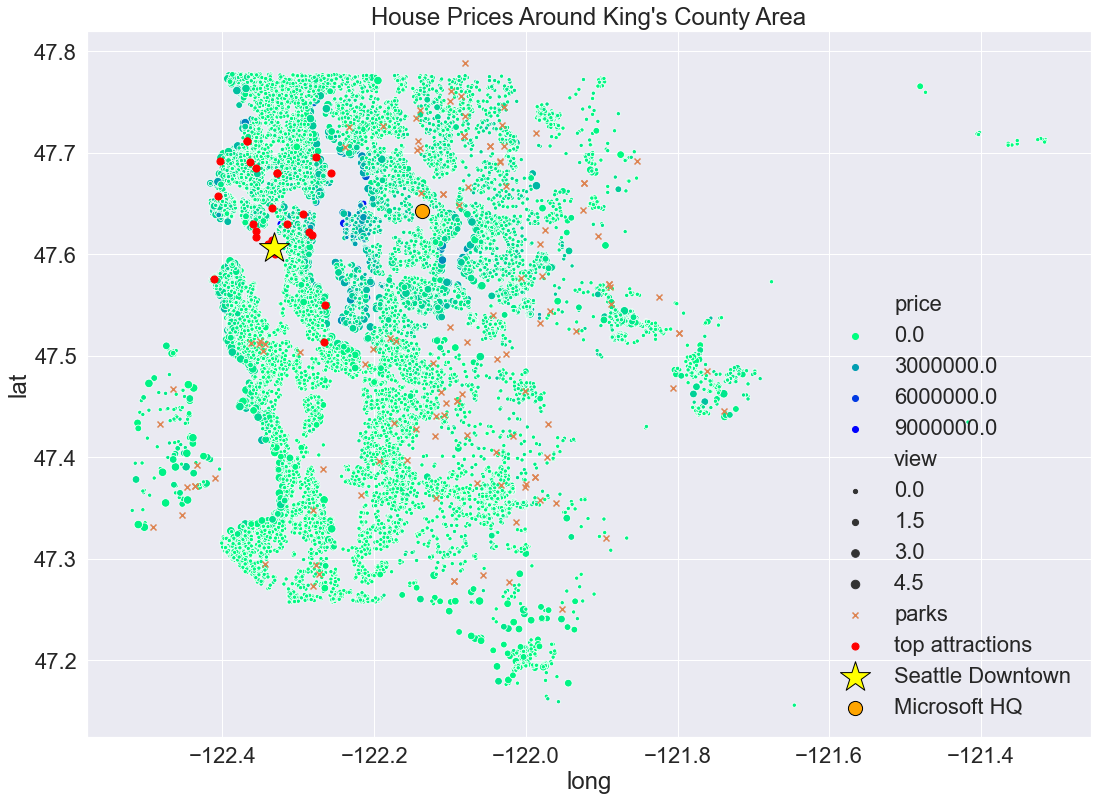

In [128]:
fig, ax = plt.subplots(figsize=(18,13))
sns.scatterplot(x='long', y='lat', size='view', hue='price', data=df, palette='winter_r' )
ax.scatter(x='long', y='lat', data=df_park, marker='x', label='parks')
ax.scatter(x='long', y='lat', data = df_attractions, marker='.', c='red', s=200, label='top attractions')
ax.scatter(x=seattle[0], y=seattle[1], marker='*', label='Seattle Downtown', edgecolor='black', color='yellow', s=1000)
ax.scatter(x=microsoft[0], y=microsoft[1], marker='o', label='Microsoft HQ', edgecolor='black', color='orange', s=200)
# sns.set(rc={'axes.facecolor':'gray', 'figure.facecolor':'white'})
plt.legend()
ax.set(title="House Prices Around King's County Area")

> Still not satisfied with the visual result... There must be a better indicator of housing values than just attractions.

### New Features : School Districts

In [129]:
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0          5650     1.0         NaN   0.0  ...            0.0      1955   
1          7242     2.0         0.0   0.0  ...          400.0      1951   
2         10000     1.0         0.0   0.0  ...            0.0      1933   
3          5000     1.0         0.0   0.0  ...          910.0      1965   
4          8080     1.0         0.0   0.0  ...            0.0      1987   
...         ...     ...         ...   ...  ...            ...       ...   
21592      1131     3.0         0.0   0.0  ...            0.0      2009   
21593      5813     2.0         0.0   0.0  ...            0.0      2014   
21594      1350     2.0         0.0   0.0  ...            0.0      2009   
21595      2388     2.0         NaN   0.0  ...            0.0      2004   
21596      1076     2.0         0.0   0.0  ...            0.0      2008   

       yr_renovated zipcode      lat     long  sqft_living15  sqft_lot15  \
0               0.0   98178  47.5112 -122.257           1340        5650   
1            1991.0   98125  47.7210 -122.319           1690        7639   
2               NaN   98028  47.7379 -122.233           2720        8062   
3               0.0   98136  47.5208 -122.393           1360        5000   
4               0.0   98074  47.6168 -122.045           1800        7503   
...             ...     ...      ...      ...            ...         ...   
21592           0.0   98103  47.6993 -122.346           1530        1509   
21593           0.0   98146  47.5107 -122.362           1830        7200   
21594           0.0   98144  47.5944 -122.299           1020        2007   
21595           0.0   98027  47.5345 -122.069           1410        1287   
21596           0.0   98144  47.5941 -122.299           1020        1357   

       microsoft   seattle  
0       0.177795  0.121099  
1       0.198379  0.115545  
2       0.135553  0.164820  
3       0.283460  0.104890  
4       0.095372  0.287296  
...          ...       ...  
21592   0.216730  0.094132  
21593   0.260746  0.100071  
21594   0.169029  0.035140  
21595   0.127402  0.272695  
21596   0.169114  0.035242  

[21597 rows x 23 columns]

### New Feature : Distances from seattle and microsoft HQ

In [120]:
microsoft = [-122.1369, 47.6423]
seattle = [-122.3321, 47.6062] 
df['microsoft'] = np.sqrt((df['long']-microsoft[0])**2+(df['lat']-microsoft[1])**2)
df['seattle'] = np.sqrt((df['long']-seattle[0])**2+(df['lat']-seattle[1])**2)

<AxesSubplot:xlabel='microsoft', ylabel='price'>

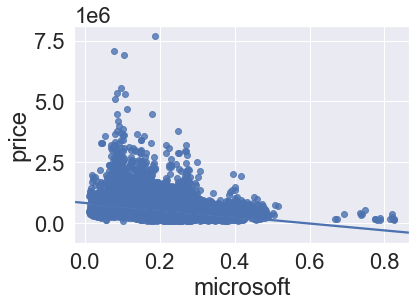

In [13]:
sns.regplot(x='microsoft', y='price', data=df)

<AxesSubplot:xlabel='seattle', ylabel='price'>

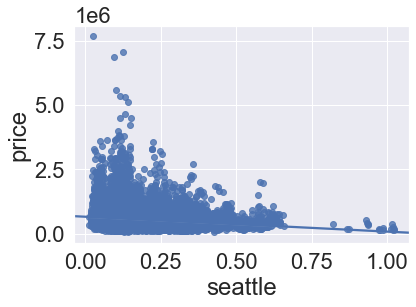

In [14]:
sns.regplot(x='seattle', y='price', data=df)

### New Feature : Time / Season

In [15]:
## Time
df['month'] = df['date'].apply(lambda x: (int(x.split('/')[0])))
df['year'] = df['date'].apply(lambda x: (int(x.split('/')[2])))

<AxesSubplot:xlabel='month', ylabel='price'>

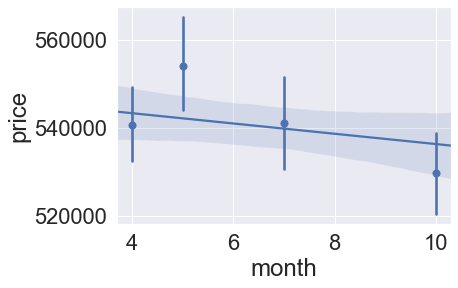

In [16]:
sns.regplot(x='month', y='price', data=df, x_bins=4)

In [17]:
seasons = {'spring':[3, 4, 5], 'summer':[6,7,8], 'autumn':[9,10,11], 'winter':[12,1,2]}

In [18]:
season_dict = {}
for key, vals in seasons.items():
    for val in vals:
        season_dict[val] = key

In [19]:
df['season'] = df['month'].apply(lambda x: season_dict[x])

<AxesSubplot:xlabel='season', ylabel='price'>

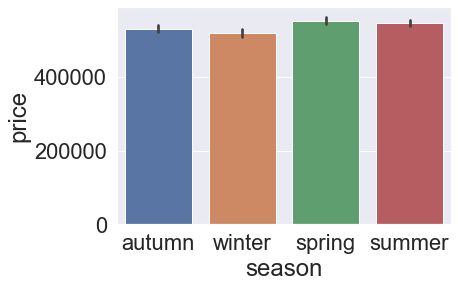

In [20]:
sns.barplot(x='season', y='price', data=df)

### New feature : living space / total rooms

<AxesSubplot:xlabel='living_div_total_rooms', ylabel='price'>

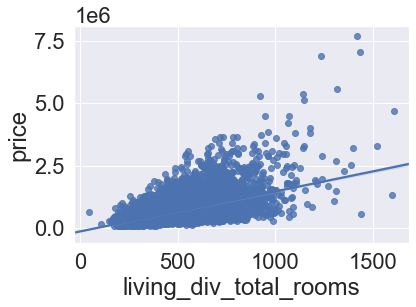

In [21]:
df['living_div_total_rooms'] = df['sqft_living'] /(df['bedrooms']+df['floors'])
sns.regplot(x='living_div_total_rooms', y='price', data=df)

<AxesSubplot:xlabel='bathrooms_x_grade', ylabel='price'>

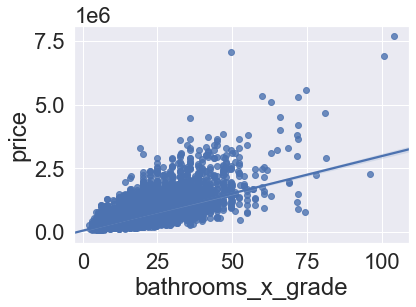

In [22]:
df['bathrooms_x_grade'] = df['bathrooms'] * df['grade']

sns.regplot(x='bathrooms_x_grade', y='price', data=df)

### New Feature : Effective Age = year sold - built year (or renov year)

<AxesSubplot:xlabel='eff_age', ylabel='price'>

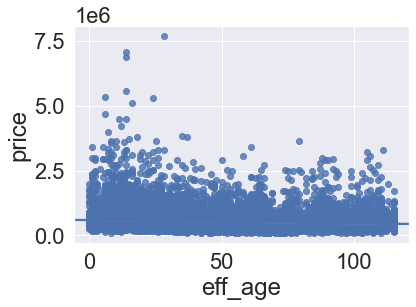

In [23]:
renov = df['yr_renovated']>1000
~renov

df['eff_age'] = 2015 - (df['yr_built']*(~renov) + (df['yr_renovated']*renov).fillna(0))

sns.regplot(x='eff_age', y='price', data=df)

### New Features: Morgtgage Rate

In [ ]:
rate = 

## Processing Data

In [24]:
model4 = MakeModel(df)

In [25]:
# waterfront: fillnas with 0s. view:fillnas with mode
model4.imuter('waterfront', option=0)
# model4.imuter('view', option='mode')

Number of nulls:  0
None


In [26]:
model4.data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'time', 'microsoft',
       'seattle', 'month', 'season', 'living_div_total_rooms',
       'bathrooms_x_grade', 'eff_age'],
      dtype='object')

In [27]:
cat_cols = ['season', 'waterfront', 'zipcode']
cont_cols = ['price', 'microsoft', 'seattle', 'living_div_total_rooms', 'bathrooms_x_grade', 'eff_age']

In [28]:
model4.set_cols(cat=cat_cols, cont=cont_cols)

['date', 'view', 'grade', 'id', 'sqft_basement', 'month', 'sqft_lot', 'lat', 'bathrooms', 'time', 'floors', 'sqft_living', 'yr_renovated', 'long', 'condition', 'sqft_lot15', 'yr_built', 'sqft_living15', 'sqft_above', 'bedrooms']
20 columns have been DELETED!
There are now 9 columns in the data.
Model Information
Shape:	(21597, 9)
Perecent Retained:	100
Dropped columns:	['date', 'view', 'grade', 'id', 'sqft_basement', 'month', 'sqft_lot', 'lat', 'bathrooms', 'time', 'floors', 'sqft_living', 'yr_renovated', 'long', 'condition', 'sqft_lot15', 'yr_built', 'sqft_living15', 'sqft_above', 'bedrooms']
Categorical columns:	['season', 'waterfront', 'zipcode']
Contiuous columns:	['price', 'microsoft', 'seattle', 'living_div_total_rooms', 'bathrooms_x_grade', 'eff_age']
Number of OHE columns:	0
Train MSE = None	Train R2 = None
Test MSE = None	Test R2 = None


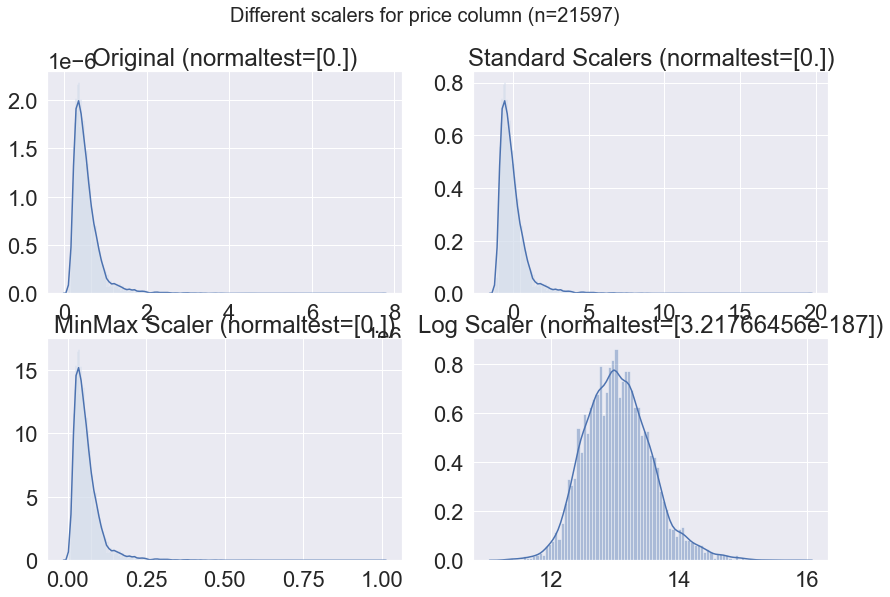

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


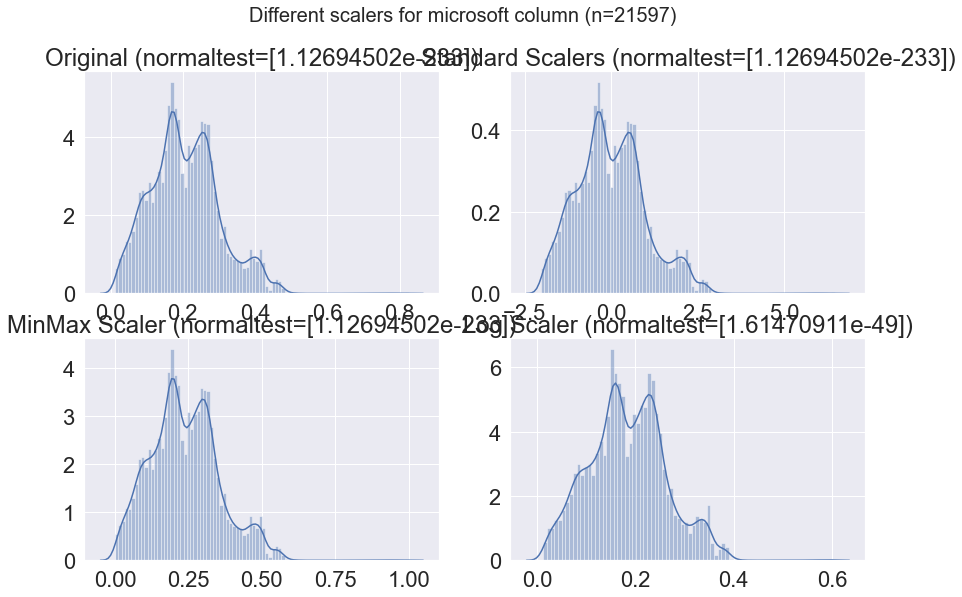

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


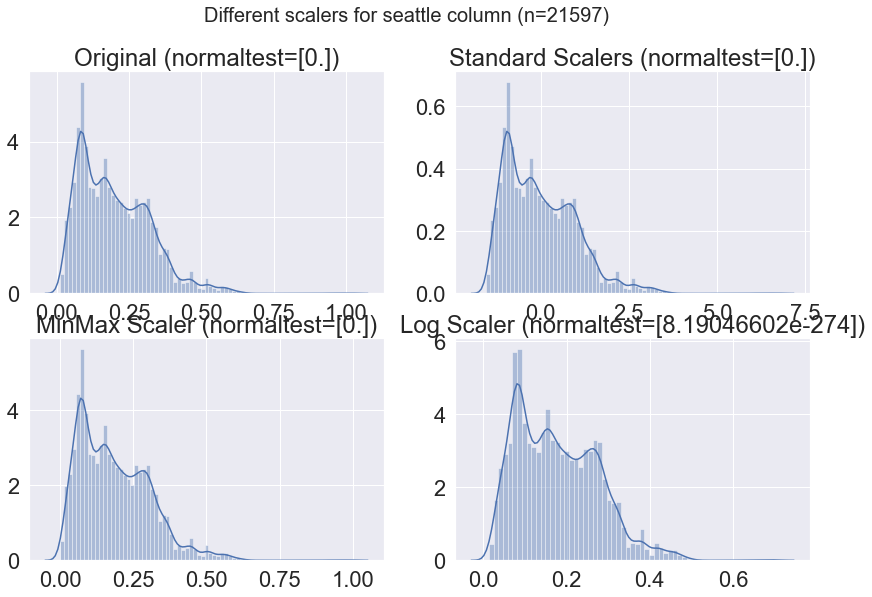

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 2


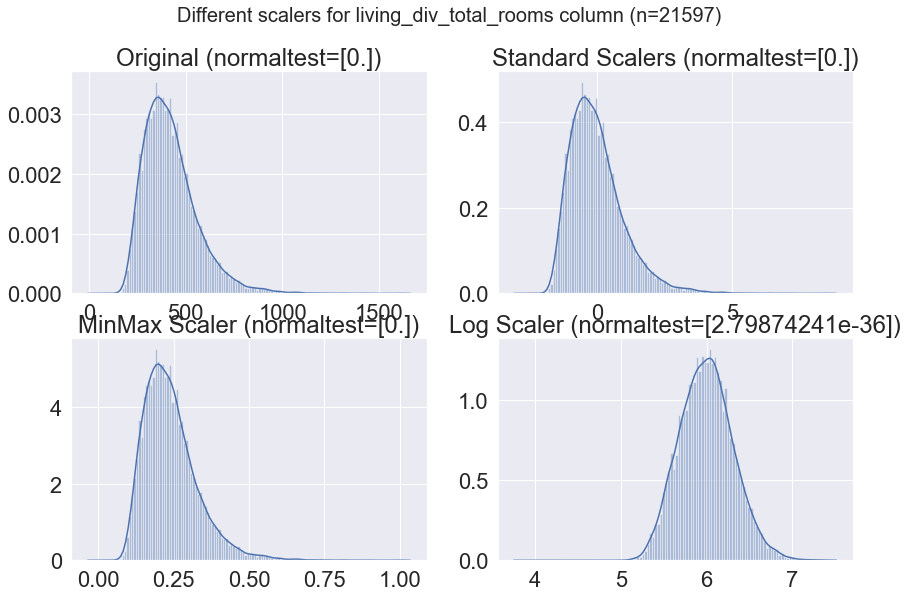

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


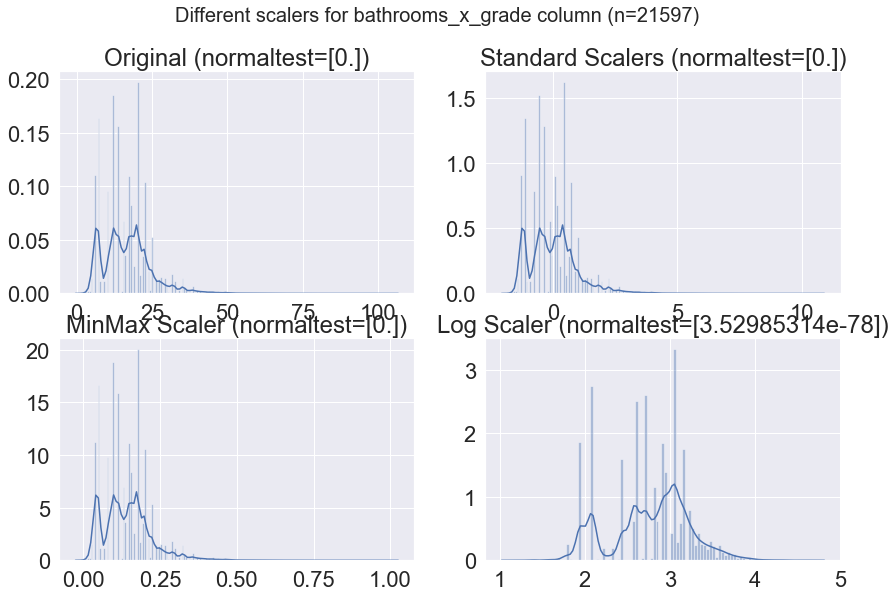

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


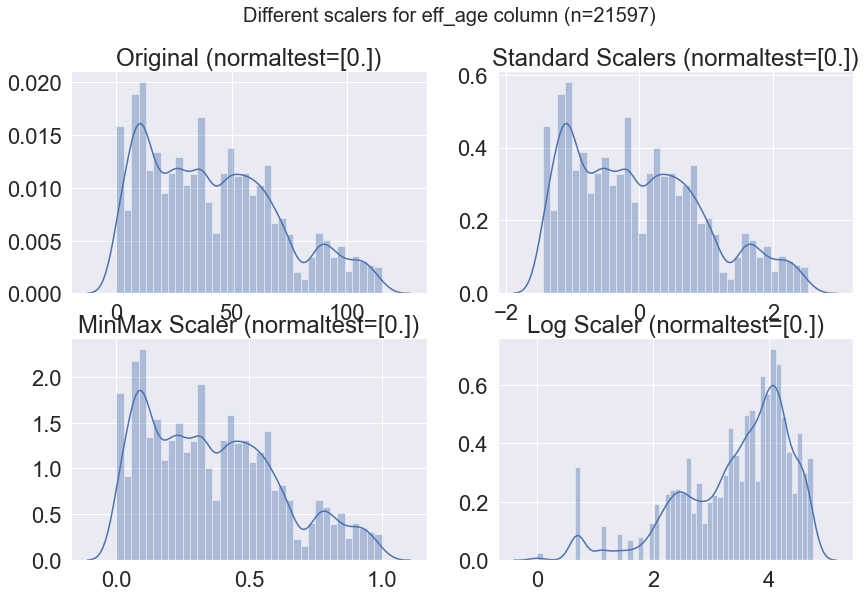

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 2


In [29]:
for col in model4.cont_cols:
    model4.scaler(col)

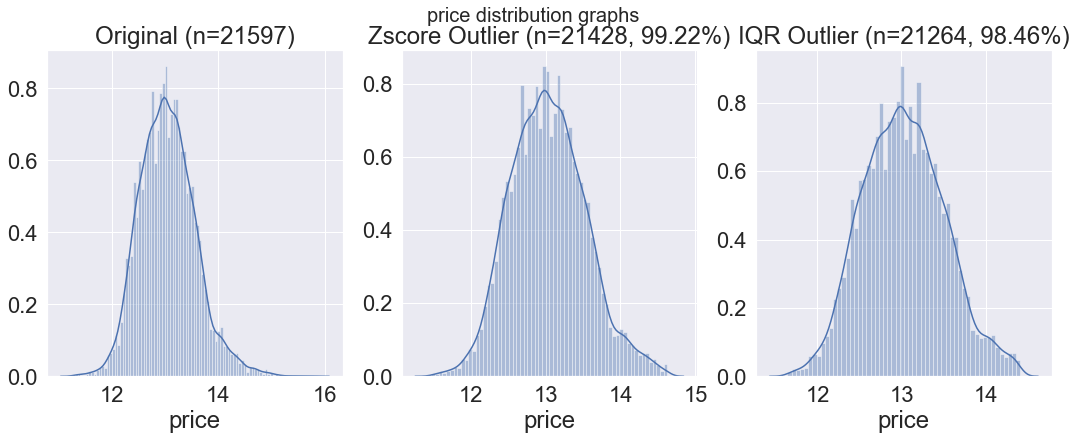

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


333 number of data have been removed by this process.

So far we have 98.458% of original data.


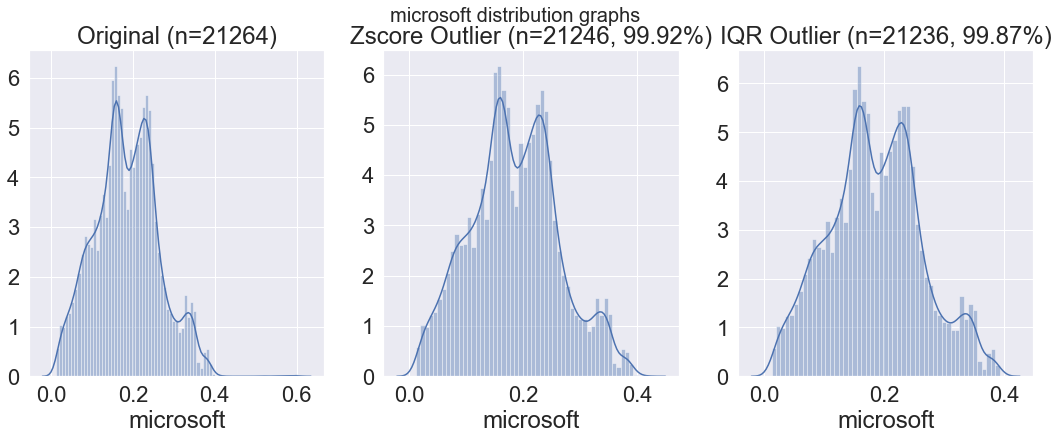

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


28 number of data have been removed by this process.

So far we have 98.328% of original data.


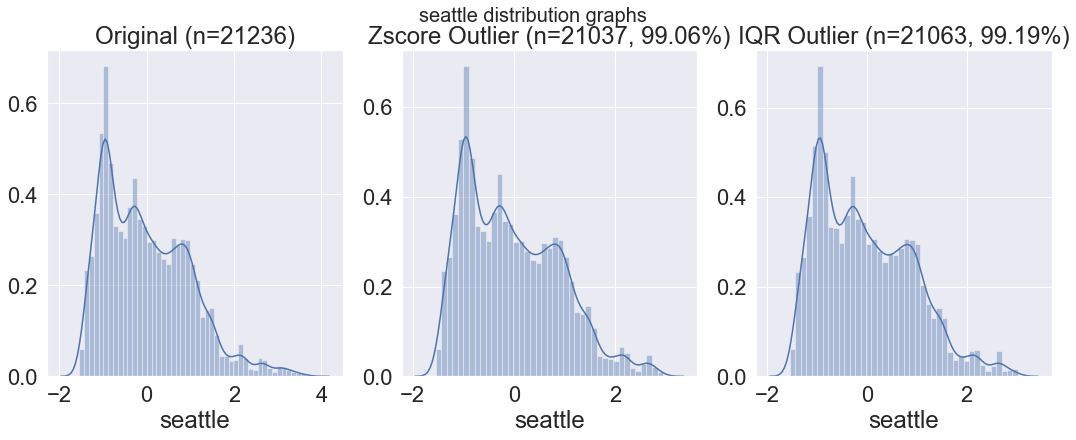

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


173 number of data have been removed by this process.

So far we have 97.527% of original data.


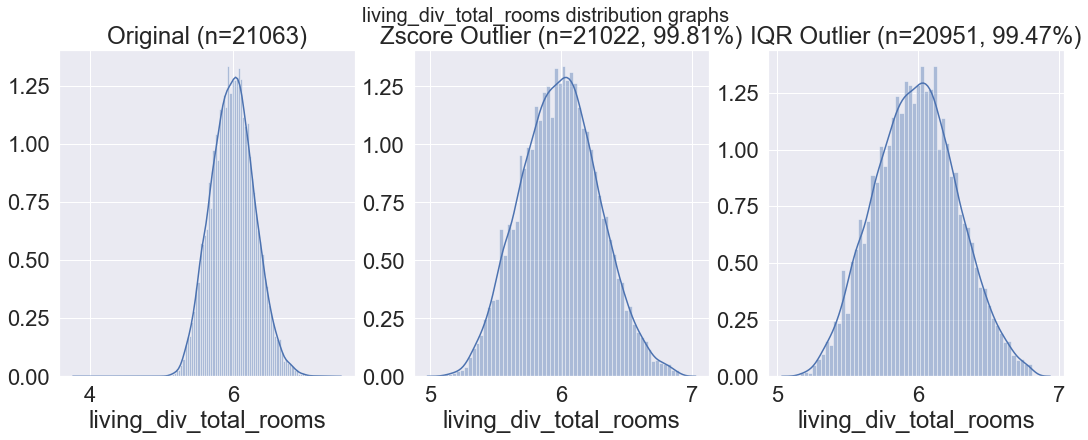

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


112 number of data have been removed by this process.

So far we have 97.009% of original data.


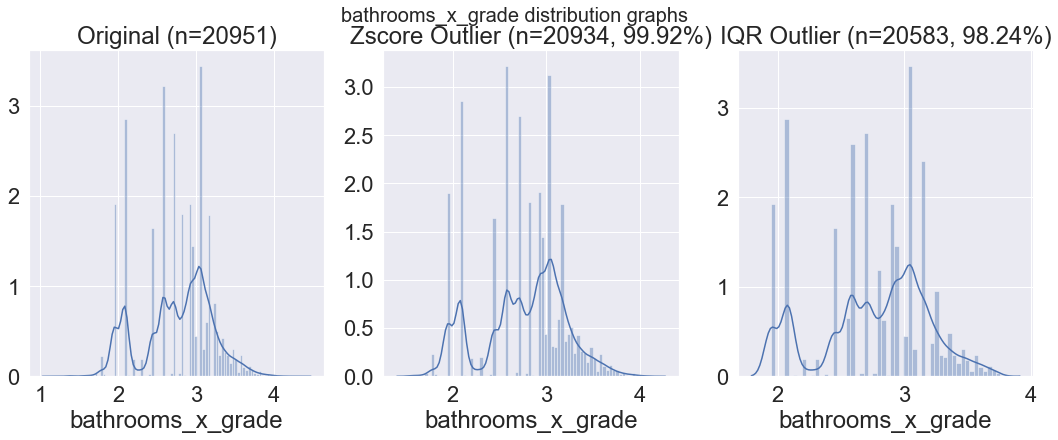

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


368 number of data have been removed by this process.

So far we have 95.305% of original data.


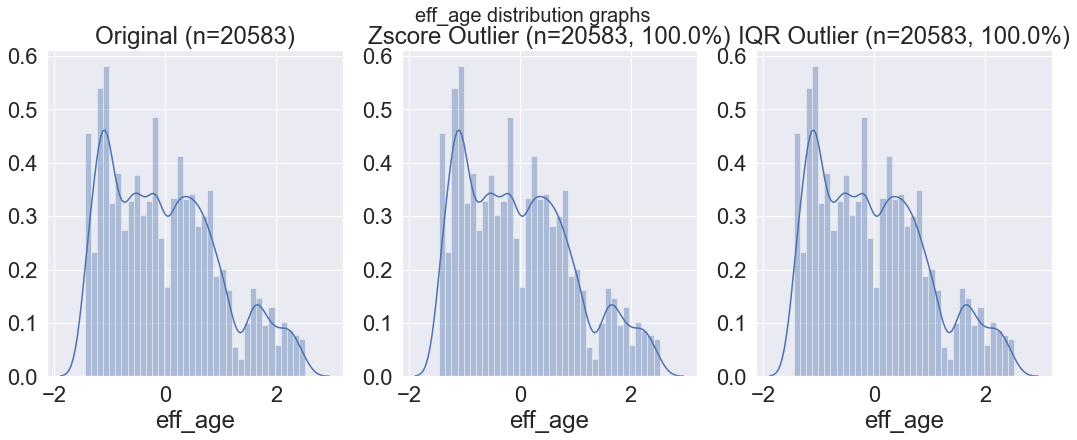

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


0 number of data have been removed by this process.

So far we have 95.305% of original data.


In [30]:
for col in model4.cont_cols:
    model4.outlier(col)

In [31]:
model4.ohe()

*** OHE TIME ***
Column Name: season
Number of unique values: 4
spring    0.301608
summer    0.293495
autumn    0.234368
winter    0.170529
Name: season, dtype: float64
Would you like to ohe column 'season' (1-yes, 2-no, x-exit): 1
Column season has been one-hot-encoded
3 columns have been added.
Total number of columns: 12
Column Name: waterfront
Number of unique values: 2
0.0    0.996162
1.0    0.003838
Name: waterfront, dtype: float64
Would you like to ohe column 'waterfront' (1-yes, 2-no, x-exit): 1
Column waterfront has been one-hot-encoded
1 columns have been added.
Total number of columns: 13
Column Name: zipcode
Number of unique values: 70
98103    0.028713
98038    0.028373
98115    0.028081
98052    0.027596
98117    0.026235
           ...   
98010    0.004518
98024    0.003401
98148    0.002672
98045    0.002429
98039    0.001020
Name: zipcode, Length: 70, dtype: float64
Would you like to ohe column 'zipcode' (1-yes, 2-no, x-exit): 1
Column zipcode has been one-hot-encoded


#model4.fix_col_names()

In [36]:
model4.fix_col_names()

In [32]:
model4.split()

Shape of X_train: (15437, 78)
Shape of X_test: (5146, 78)
Shape of y_train: (15437,)
Shape of y_test: (5146,)


In [33]:
model4.regression()

Formula:
price ~ microsoft + seattle + living_div_total_rooms + bathrooms_x_grade + eff_age + season_spring + season_summer + season_winter + waterfront_10 + zipcode_98002 + zipcode_98003 + zipcode_98004 + zipcode_98005 + zipcode_98006 + zipcode_98007 + zipcode_98008 + zipcode_98010 + zipcode_98011 + zipcode_98014 + zipcode_98019 + zipcode_98022 + zipcode_98023 + zipcode_98024 + zipcode_98027 + zipcode_98028 + zipcode_98029 + zipcode_98030 + zipcode_98031 + zipcode_98032 + zipcode_98033 + zipcode_98034 + zipcode_98038 + zipcode_98039 + zipcode_98040 + zipcode_98042 + zipcode_98045 + zipcode_98052 + zipcode_98053 + zipcode_98055 + zipcode_98056 + zipcode_98058 + zipcode_98059 + zipcode_98065 + zipcode_98070 + zipcode_98072 + zipcode_98074 + zipcode_98075 + zipcode_98077 + zipcode_98092 + zipcode_98102 + zipcode_98103 + zipcode_98105 + zipcode_98106 + zipcode_98107 + zipcode_98108 + zipcode_98109 + zipcode_98112 + zipcode_98115 + zipcode_98116 + zipcode_98117 + zipcode_98118 + zipcode_98

In [34]:
model4.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     819.8
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:59:05   Log-Likelihood:                 2202.9
No. Observations:               15437   AIC:                            -4248.
Df Residuals:                   15358   BIC:                            -3644.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8.9035      0.059    151.496      0.000       8.788       9.019
microsoft                 -1.1290      0.153     -7.369      0.000      -1.429      -0.829
seattle                   -0.0233      0.014     -1.708      0.088      -0.050       0.003
living_div_total_rooms     0.4843      0.007     64.641      0.000       0.470       0.499
bathrooms_x_grade          0.3926      0.006     64.657      0.000       0.381       0.405
eff_age                    0.0293      0.002     11.957      0.000       0.024       0.034
season_spring              0.0514      0.005     11.005      0.000       0.042       0.061
season_summer              0.0103      0.005      2.189      0.029       0.001       0.019
season_winter              0.0113      0.005      2.096      0.036       0.001       0.022
waterfront_10              0.6919      0.027     25.558      0.000       0.639       0.745
zipcode_98002             -0.0365      0.022     -1.669      0.095      -0.079       0.006
zipcode_98003             -0.0002      0.019     -0.011      0.991      -0.038       0.038
zipcode_98004              0.8719      0.034     25.321      0.000       0.804       0.939
zipcode_98005              0.4834      0.039     12.249      0.000       0.406       0.561
zipcode_98006              0.4657      0.033     14.117      0.000       0.401       0.530
zipcode_98007              0.3603      0.043      8.456      0.000       0.277       0.444
zipcode_98008              0.3480      0.041      8.480      0.000       0.268       0.428
zipcode_98010              0.2977      0.032      9.226      0.000       0.234       0.361
zipcode_98011              0.2309      0.032      7.256      0.000       0.169       0.293
zipcode_98014              0.3113      0.038      8.154      0.000       0.236       0.386
zipcode_98019              0.2325      0.035      6.695      0.000       0.164       0.301
zipcode_98022              0.2387      0.028      8.452      0.000       0.183       0.294
zipcode_98023              0.0076      0.018      0.430      0.667      -0.027       0.042
zipcode_98024              0.4061      0.041      9.851      0.000       0.325       0.487
zipcode_98027              0.3597      0.031     11.707      0.000       0.300       0.420
zipcode_98028              0.2156      0.027      7.919      0.000       0.162       0.269
zipcode_98029              0.4332      0.033     13.151      0.000       0.369       0.498
zipcode_98030             -0.0372      0.022     -1.718      0.086      -0.080       0.005
zipcode_98031             -0.0349      0.022     -1.564      0.118      -0.079       0.009
zipcode_98032             -0.0692      0.027     -2.604      0.009      -0.121      -0.017
zipcode_98033              0.5086      0.035     14.560      0.000       0.440  

In [35]:
model4.multicolinearity()


                    Options:
                    	1. Correlation Matrix
                    	2. Variance Inflation Factor (VIF)
                  
Choose which method you would like to determine multicolinearity variables: 2
        variables          VIF
0           const  1196.754663
2         seattle    57.820301
1       microsoft    47.326216
37  zipcode_98052    13.781022
46  zipcode_98074     9.315511
30  zipcode_98033     8.320238
38  zipcode_98053     8.015953
14  zipcode_98006     7.974624
31  zipcode_98034     7.757030
16  zipcode_98008     7.717486


Write cut-off value (Usually 7, x-exit): 7
cont
cont
9 columns have been DELETED!
There are now 73 columns in the data.
                 variables         VIF
0                    const  533.051304
2        bathrooms_x_grade    2.378097
3                  eff_age    2.003336
1   living_div_total_rooms    1.621079
4            season_spring    1.603784
5            season_summer    1.596728
6            season_winter    1.439799

In [36]:
model4.p_value_cut_off()

        variables   p_value
11  zipcode_98003  0.991300
77  zipcode_98198  0.766870
22  zipcode_98023  0.666868
70  zipcode_98148  0.505556
35  zipcode_98042  0.360341
75  zipcode_98178  0.237018
41  zipcode_98058  0.205284
76  zipcode_98188  0.139722
28  zipcode_98031  0.117937
39  zipcode_98055  0.097458
Write cut-off p-value (Usually 0.05, Enter "x" to exit): 0.05
['seattle', 'zipcode_98002', 'zipcode_98003', 'zipcode_98023', 'zipcode_98030', 'zipcode_98031', 'zipcode_98042', 'zipcode_98055', 'zipcode_98058', 'zipcode_98148', 'zipcode_98178', 'zipcode_98188', 'zipcode_98198'] not found in the data. Try again.


In [49]:
model4.data.columns

Index(['price', 'waterfront', 'zipcode', 'season', 'living_div_total_rooms',
       'bathrooms_x_grade', 'eff_age', 'season_spring', 'season_summer',
       'season_winter', 'waterfront_10', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98007', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', '

In [417]:
model4.split()
model4.regression()
model4.model.summary()

Shape of X_train: (15391, 7)
Shape of X_test: (5131, 7)
Shape of y_train: (15391,)
Shape of y_test: (5131,)
Formula:
price ~ microsoft + seattle + living_div_total_rooms + bathrooms_x_grade + eff_age + season_spring + waterfront_10


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     3238.
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:49:07   Log-Likelihood:                -8669.7
No. Observations:               15391   AIC:                         1.736e+04
Df Residuals:                   15383   BIC:                         1.742e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.0855      0.004    -20.647      0.000      -0.094      -0.077
microsoft                 -0.1724      0.004    -44.520      0.000      -0.180      -0.165
seattle                   -0.1474      0.004    -33.910      0.000      -0.156      -0.139
living_div_total_rooms     0.2189      0.005     43.787      0.000       0.209       0.229
bathrooms_x_grade          0.4240      0.006     70.315      0.000       0.412       0.436
eff_age                    0.1296      0.005     27.712      0.000       0.120       0.139
season_spring              0.0636      0.007      8.529      0.000       0.049       0.078
waterfront_10              0.9756      0.058     16.930      0.000       0.863       1.089
==============================================================================
Omnibus:                     2798.631   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7568.494
Skew:                           0.982   Prob(JB):                         0.00
Kurtosis:                       5.818   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Train MSE = 0.180633063759515	Train R2 = 0.5956720330189383
Test MSE = 0.17473165020220668	Test R2 = 0.5919040170278359


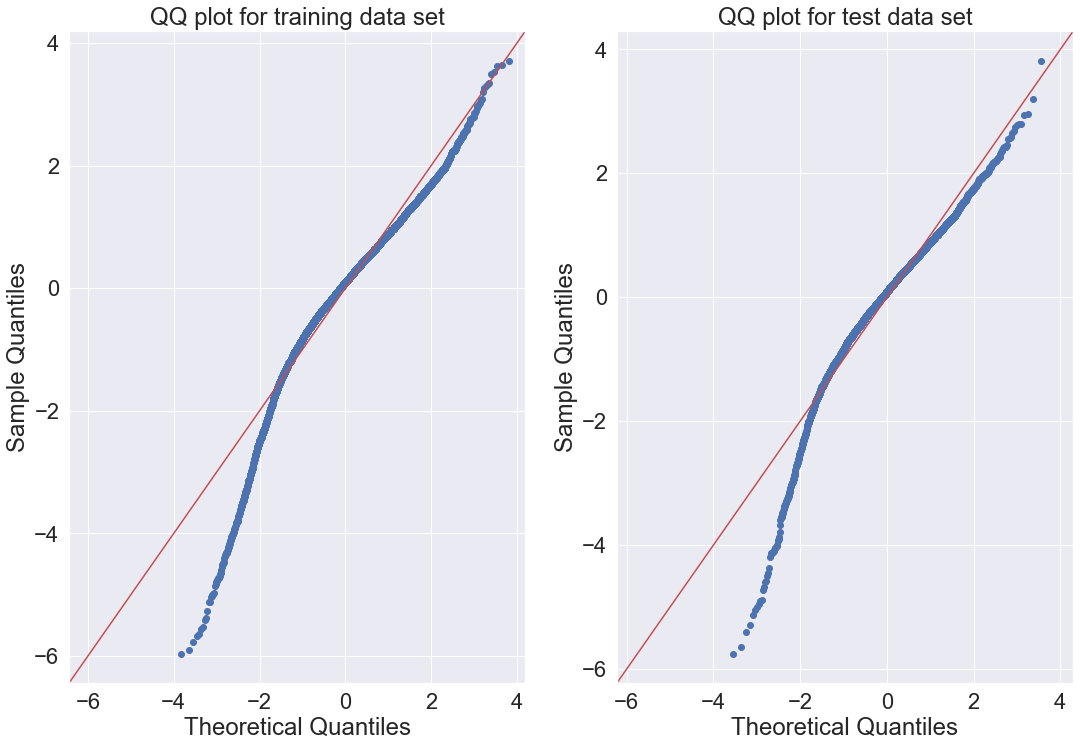

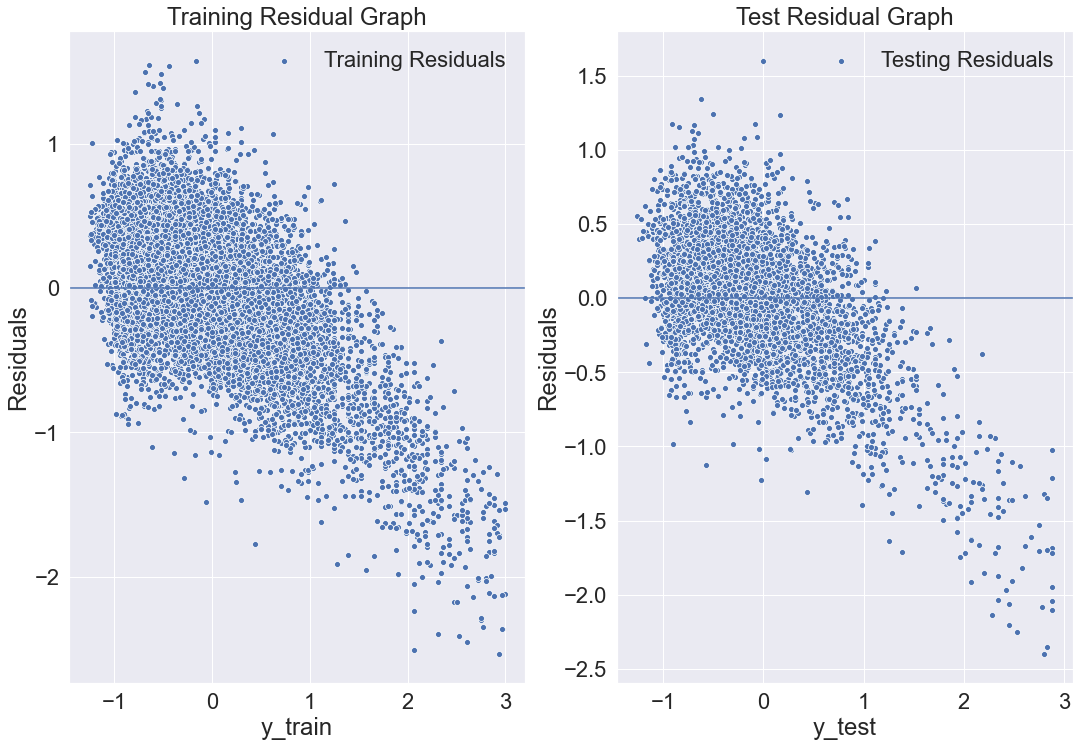

In [418]:
model4.validate_model()


                    Options:
                    	1. Correlation Matrix
                    	2. Variance Inflation Factor (VIF)
                  
Choose which method you would like to determine multicolinearity variables: 1


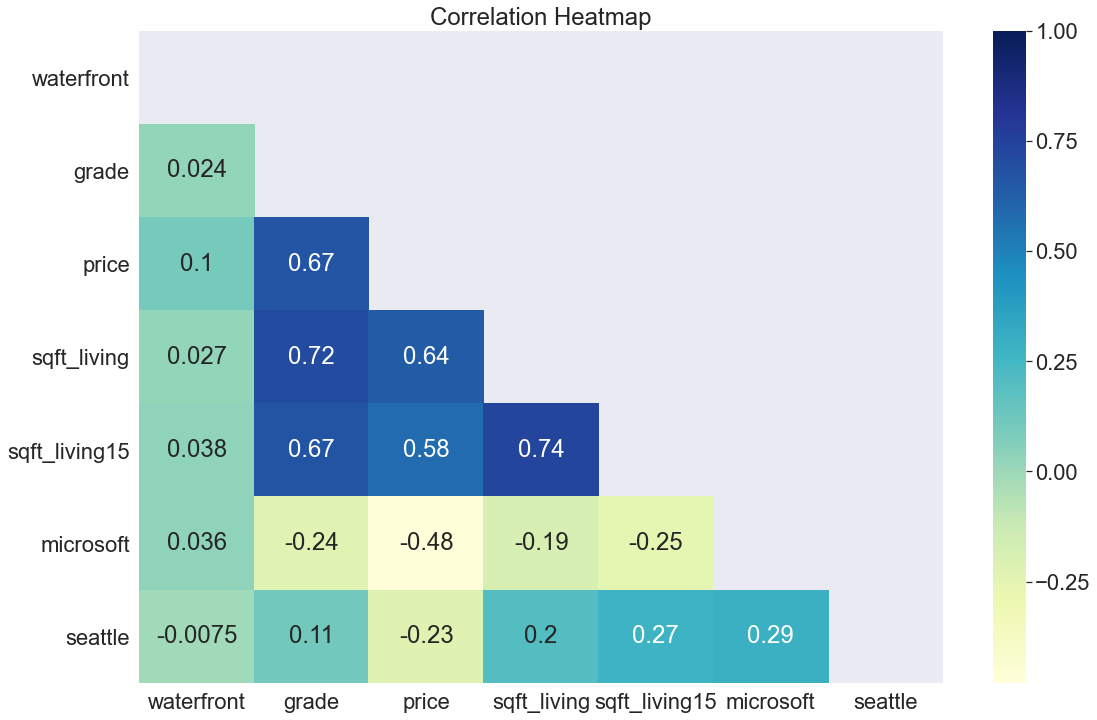

sqft_living    sqft_living15    0.736008
grade          sqft_living      0.715036
               sqft_living15    0.672310
               price            0.665092
price          sqft_living      0.638356
               sqft_living15    0.577957
               microsoft        0.480664
microsoft      seattle          0.293942
sqft_living15  seattle          0.271518
               microsoft        0.254431
dtype: float64


Write column name you would like to get rid of (Enter "x" to exit): sqft_living15
'sqft_living15' has been DELETED!
There are now 25 columns in the data.


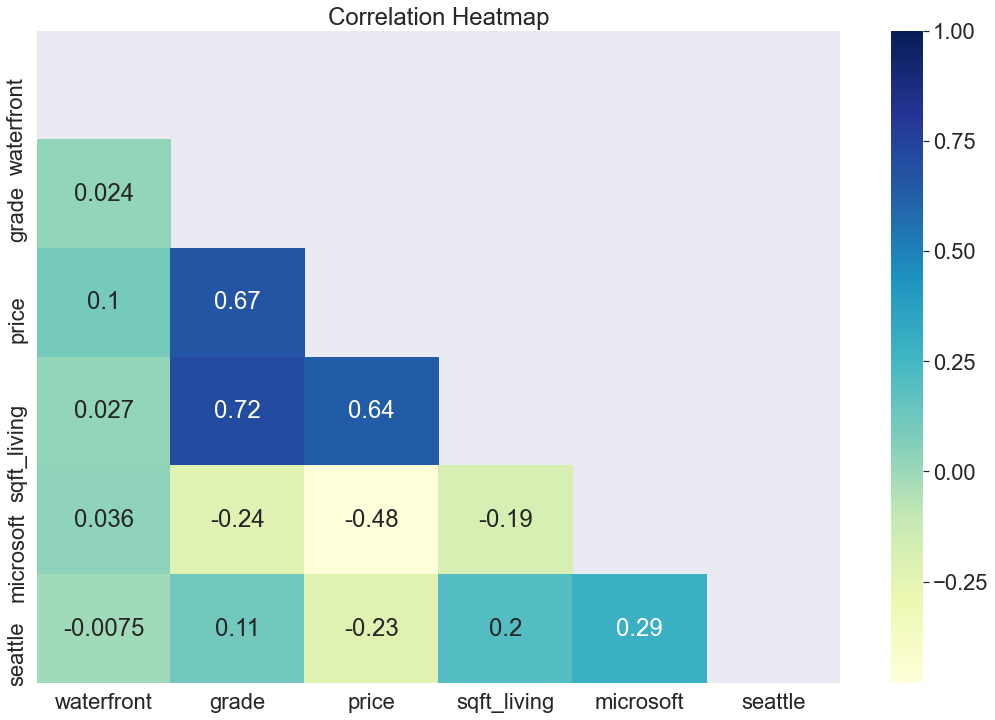

grade        sqft_living    0.715036
             price          0.665092
price        sqft_living    0.638356
             microsoft      0.480664
microsoft    seattle        0.293942
grade        microsoft      0.237312
price        seattle        0.225818
sqft_living  seattle        0.203507
             microsoft      0.188852
grade        seattle        0.113895
dtype: float64


Write column name you would like to get rid of (Enter "x" to exit): grade
'grade' has been DELETED!
There are now 25 columns in the data.


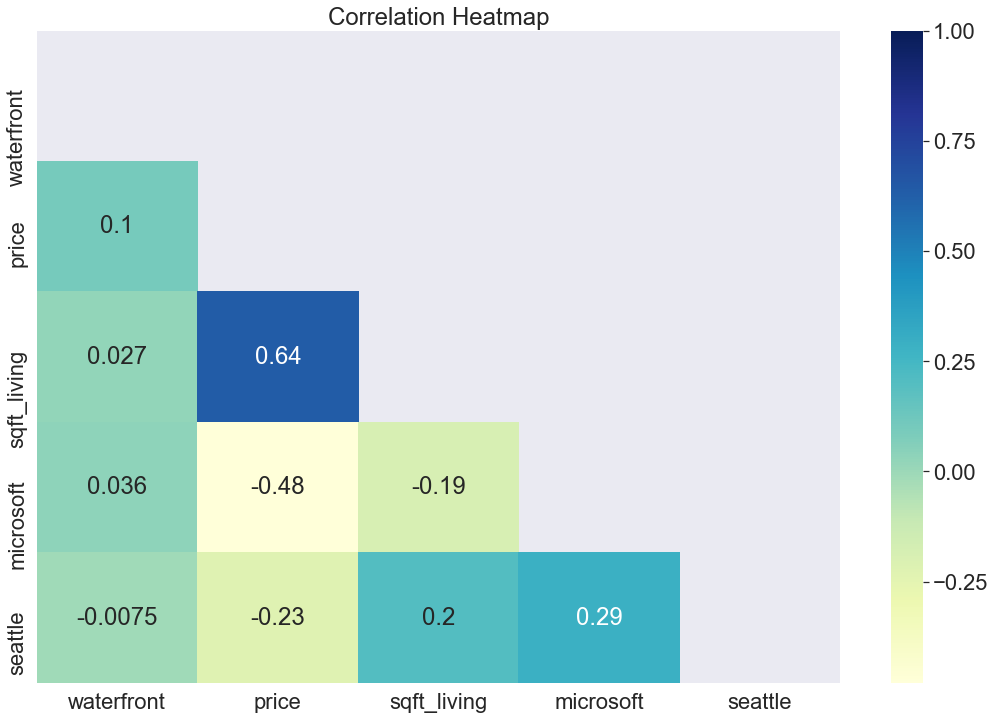

price        sqft_living    0.638356
             microsoft      0.480664
microsoft    seattle        0.293942
price        seattle        0.225818
sqft_living  seattle        0.203507
             microsoft      0.188852
waterfront   price          0.102227
             microsoft      0.035774
             sqft_living    0.027272
             seattle        0.007498
dtype: float64


Write column name you would like to get rid of (Enter "x" to exit): x
Exiting!
There are 25 columns remaining in the data


In [294]:
model4.multicolinearity


# Conclusion

According to the final model, the following factors are the biggest + affectors in price:

    1. living area = more space means higher price
    2. waterfront = having waterfront increases the value of the price
    3. grade x bathrooms = better quality bathrooms help out!
    4. higher latitude = usually results in higher price

According to the final model, the following factors are the biggest negative affectors in price:

    1. longitude = higher longitude results in lower price
    2. bath + bed = having too many little spaces are not good
    2. grade 5 = having mid-rank grade lowers the price of the house

# Further Studies

- Further studies in creating new features that can better show how 'grade', 'bathroom' are related to the price
- Further studies in creating new features that can somehow show relationship between geographical location of the houses and their prices

Suggestions - R^2 Improvement

- day of the week
- season of the week
- location information - distance to the city
                       - amazon's headquarter
- mortgage rate during the time